In [1]:
require(readr)
require(mgcv)
require(partykit)
require(itsadug)
require(languageR)
require(lattice)

Loading required package: readr

Loading required package: mgcv

Loading required package: nlme

This is mgcv 1.8-38. For overview type 'help("mgcv-package")'.

Loading required package: partykit

Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: itsadug

Warning message:
"package 'itsadug' was built under R version 4.1.3"
Loading required package: plotfunctions

Warning message:
"package 'plotfunctions' was built under R version 4.1.3"
Loaded package itsadug 2.4 (see 'help("itsadug")' ).

Loading required package: languageR

Warning message:
"package 'languageR' was built under R version 4.1.3"
Loading required package: lattice



In [2]:
popt = function(w, h, r=200) { options(repr.plot.width=w, repr.plot.height=h, repr.plot.res=r) }

In [4]:
data = read_csv("../data/meld_bisyll_nw.csv")
data$RTinv = -1000/data$RT
data$logERR = log(data$ERR+1)
data$log_dist_range = log(data$dist_range)
data$C1lognwf = log(data$C1nwf+1)
data$C2lognwf = log(data$C2nwf+1)

Rows: 10022 Columns: 22

-- Column specification ------------------------------------------------------------------------------------------------
Delimiter: ","
chr  (1): word
dbl (21): id, lexicality, N, RT, RTSD, zRT, zRTSD, ERR, C1stroke, C2stroke, ...


i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
names(data)

[1] "id"             "word"           "lexicality"     "N"             
 [5] "RT"             "RTSD"           "zRT"            "zRTSD"         
 [9] "ERR"            "C1stroke"       "C2stroke"       "C1nwf"         
[13] "C2nwf"          "C1logcf"        "C2logcf"        "C1nom"         
[17] "C2nom"          "C1nop"          "C2nop"          "dist_mtop5"    
[21] "dist_range"     "dist_mean"      "RTinv"          "logERR"        
[25] "log_dist_range" "C1lognwf"       "C2lognwf"

In [6]:
head(data)

id,word,lexicality,N,RT,RTSD,zRT,zRTSD,ERR,C1stroke,...,C1nop,C2nop,dist_mtop5,dist_range,dist_mean,RTinv,logERR,log_dist_range,C1lognwf,C2lognwf
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
210023,一<U+8BB3>,2,37,880.3478,340.8290,0.04479982,0.9262310,7.50000,1,...,1,1,0.7984871,0.03131234,0.7722696,-1.1359146,2.140066,-3.463743,6.687109,2.079442
210024,一<U+5356>,2,38,907.0745,362.4958,0.25291430,1.0683960,9.52381,1,...,1,1,0.8021797,0.05740751,0.7531907,-1.1024453,2.353640,-2.857580,6.687109,4.007333
210025,一<U+9636>,2,12,1012.0725,463.3832,0.58263379,1.6049369,71.42857,1,...,1,1,0.9405731,0.07914563,0.8893726,-0.9880715,4.282601,-2.536466,6.687109,3.091042
210026,一<U+89C6>,2,29,904.8062,283.2516,0.25414705,0.8718462,27.50000,1,...,1,1,0.8283562,0.03900321,0.7924290,-1.1052090,3.349904,-3.244111,6.687109,4.521789
210027,一作,2,35,937.7994,362.0582,0.29764826,1.1034553,12.50000,1,...,1,2,0.7455952,0.05612205,0.7034359,-1.0663261,2.602690,-2.880227,6.687109,5.225747
210028,一咐,2,41,824.1400,257.8738,-0.02375656,0.7067070,0.00000,1,...,1,1,0.8317757,0.03902958,0.7945036,-1.2133861,0.000000,-3.243435,6.687109,1.098612


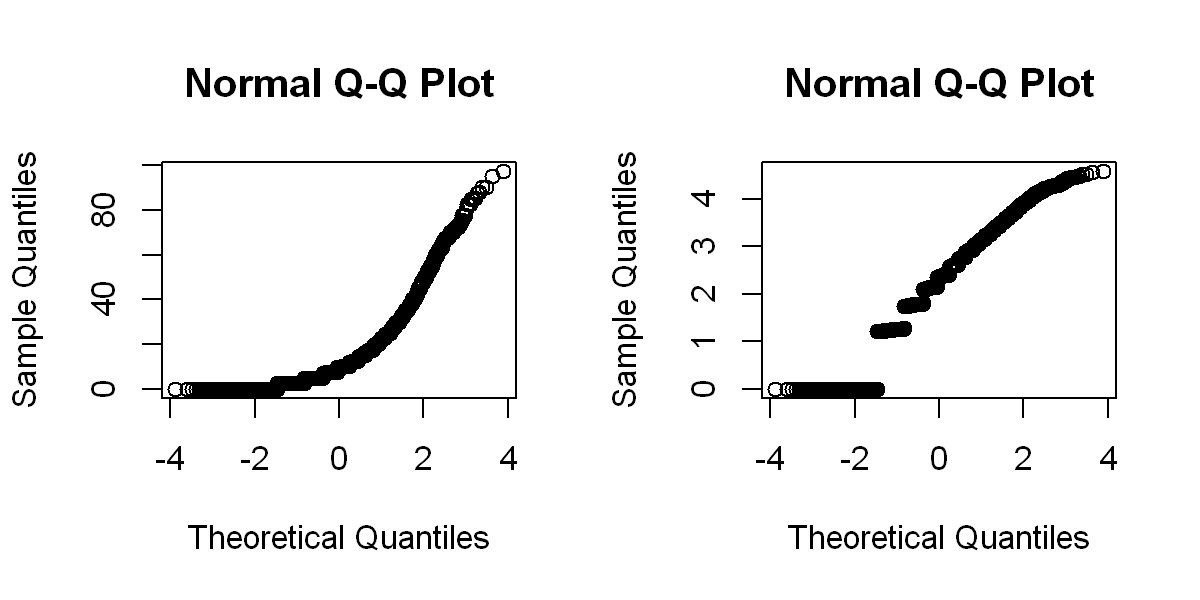

In [7]:
popt(6,3)
par(mfrow=c(1, 2))
qqnorm(data$ERR)
qqnorm(log(data$ERR+1))

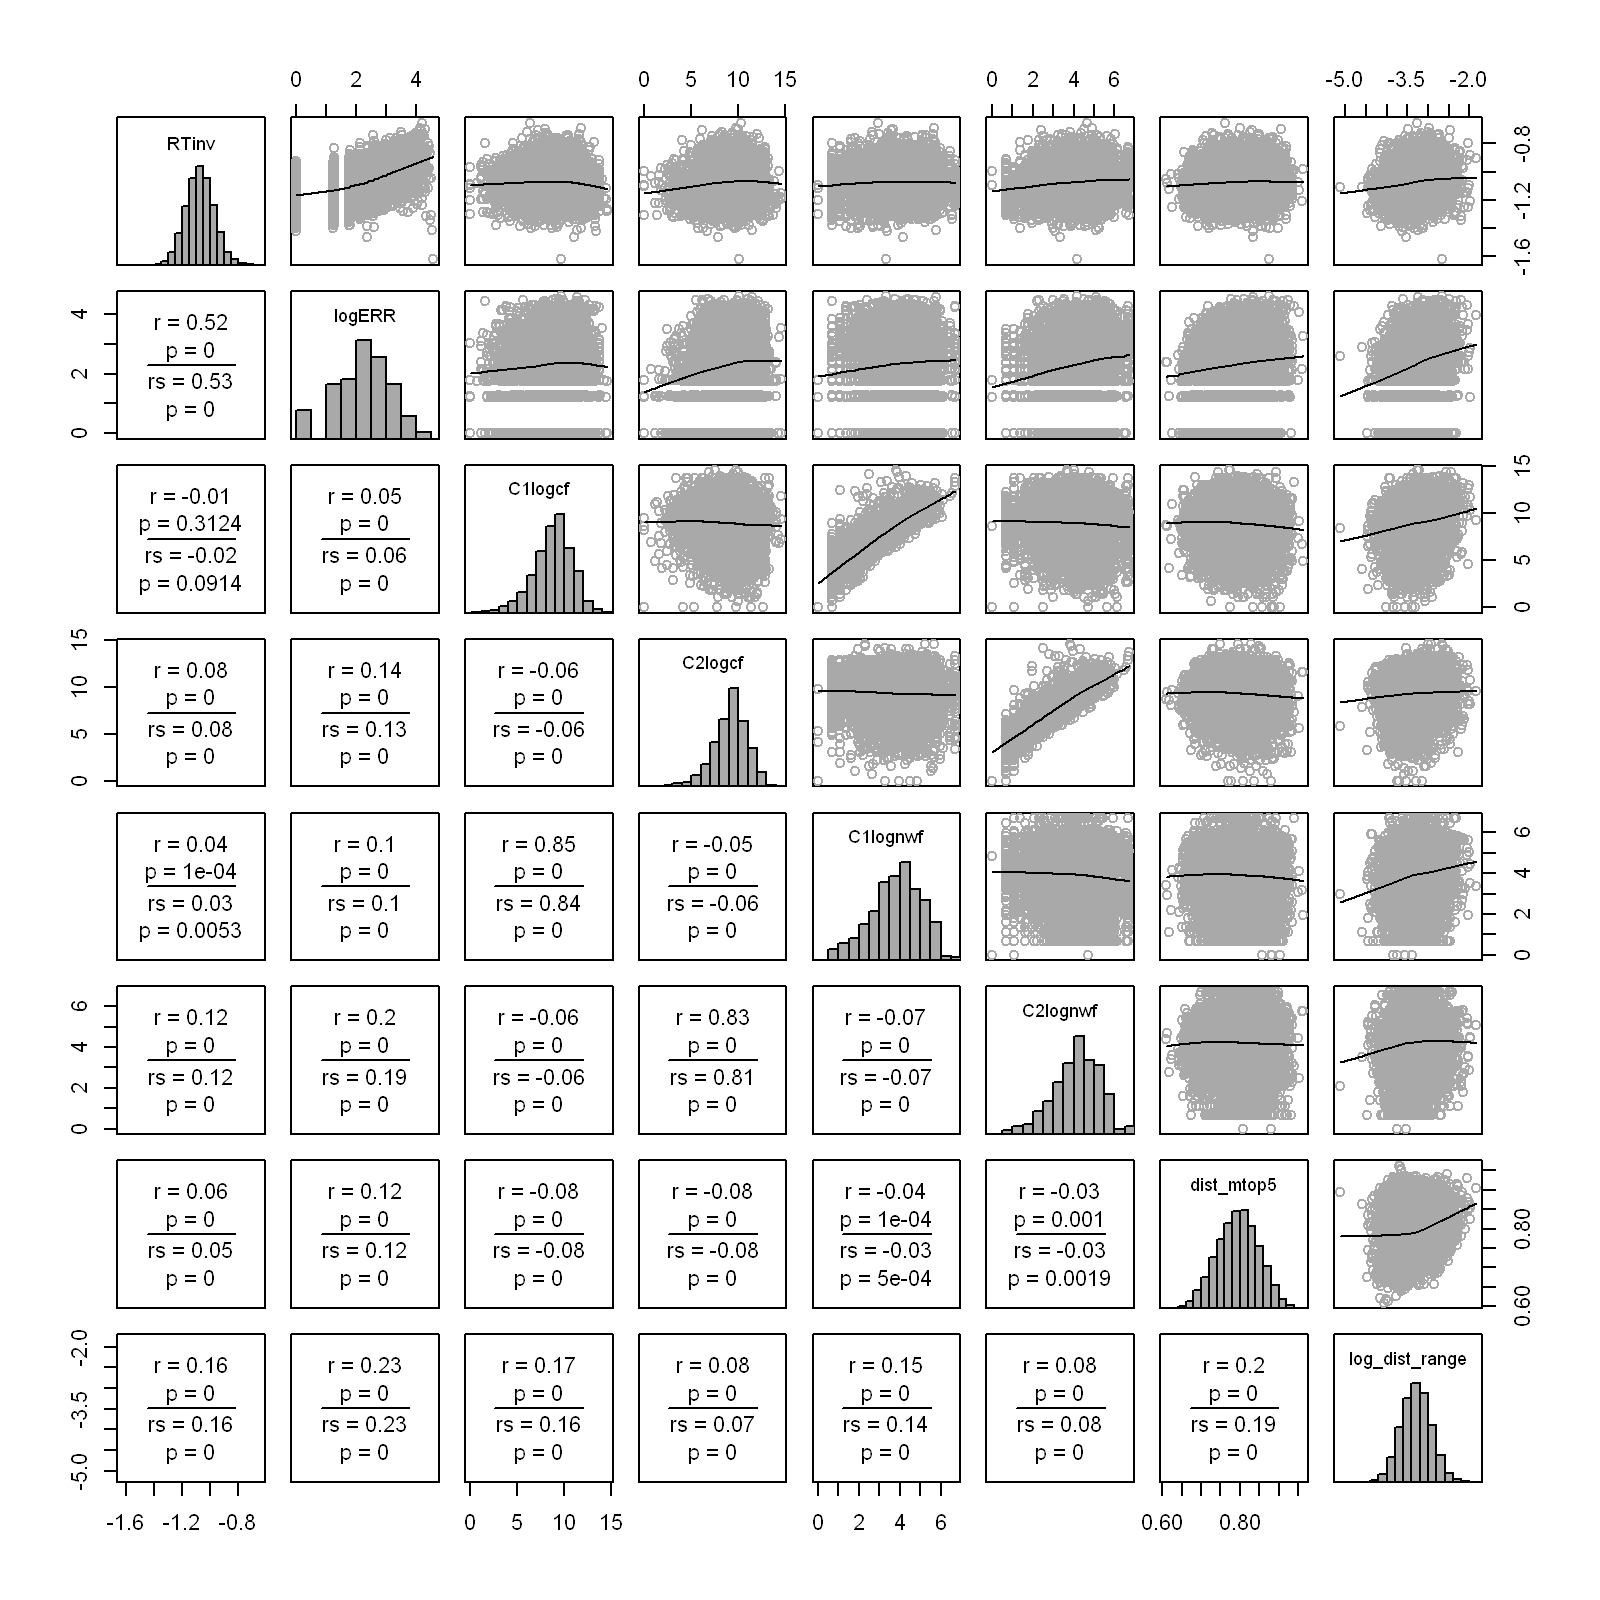

In [8]:
popt(8,8)
pairscor.fnc(data[,strsplit("RTinv,logERR,C1logcf,C2logcf,C1lognwf,C2lognwf,dist_mtop5,log_dist_range", ",")[[1]]])

## Variable Importance with random forest

### ERR

In [9]:
rf.vars.1 = strsplit(paste0("logERR,",
        "C1logcf,C2logcf,C1stroke,C2stroke,C1lognwf,C2lognwf,C1nom,C2nom,C1nop,C2nop,dist_mtop5,log_dist_range"),",")[[1]]
cf.1 = cforest(logERR~., data=data[,rf.vars.1], ntree=100)
vi.1 = varimp(cf.1)

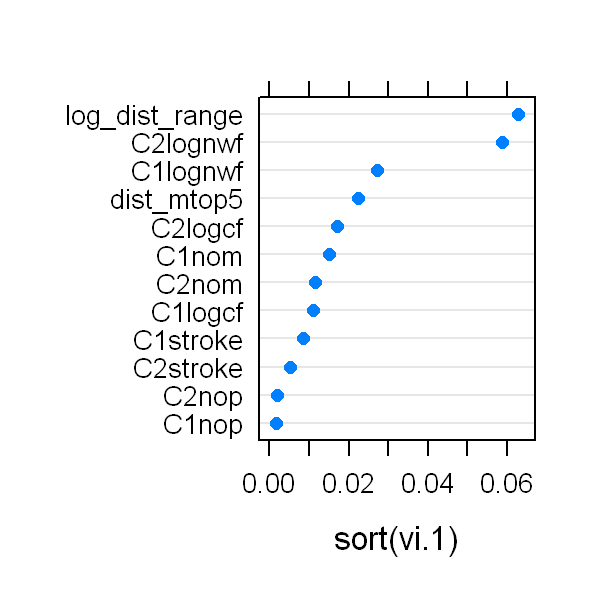

In [10]:
popt(3, 3, 200)
dotplot(sort(vi.1), main=list(cex=2))

### RTinv

In [11]:
rf.vars.2 = strsplit(paste0("RTinv,",
        "C1logcf,C2logcf,C1stroke,C2stroke,C1lognwf,C2lognwf,C1nom,C2nom,C1nop,C2nop,dist_mtop5,log_dist_range"),",")[[1]]
cf.2 = cforest(RTinv~., data=data[,rf.vars.2], ntree=100)
vi.2 = varimp(cf.2)

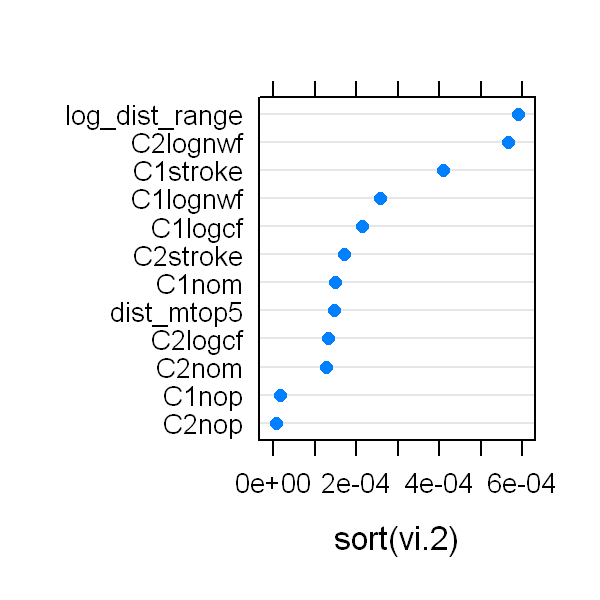

In [12]:
popt(3, 3, 200)
dotplot(sort(vi.2), main=list(cex=2))

## GAM with ERR

### Err.0

In [22]:
err.0 = bam(logERR~s(log_dist_range)+s(dist_mtop5)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [23]:
summary(err.0)


Family: gaussian 
Link function: identity 

Formula:
logERR ~ s(log_dist_range) + s(dist_mtop5) + te(C1lognwf, C2lognwf) + 
    te(C1logcf, C2logcf)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.22875    0.00885   251.8   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                         edf Ref.df      F p-value    
s(log_dist_range)      2.733  3.511 106.51  <2e-16 ***
s(dist_mtop5)          2.003  2.556  31.20  <2e-16 ***
te(C1lognwf,C2lognwf)  5.299  6.104  57.67  <2e-16 ***
te(C1logcf,C2logcf)   10.168 12.597  10.38  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.114   Deviance explained = 11.6%
-ML =  13022  Scale est. = 0.78484   n = 10022

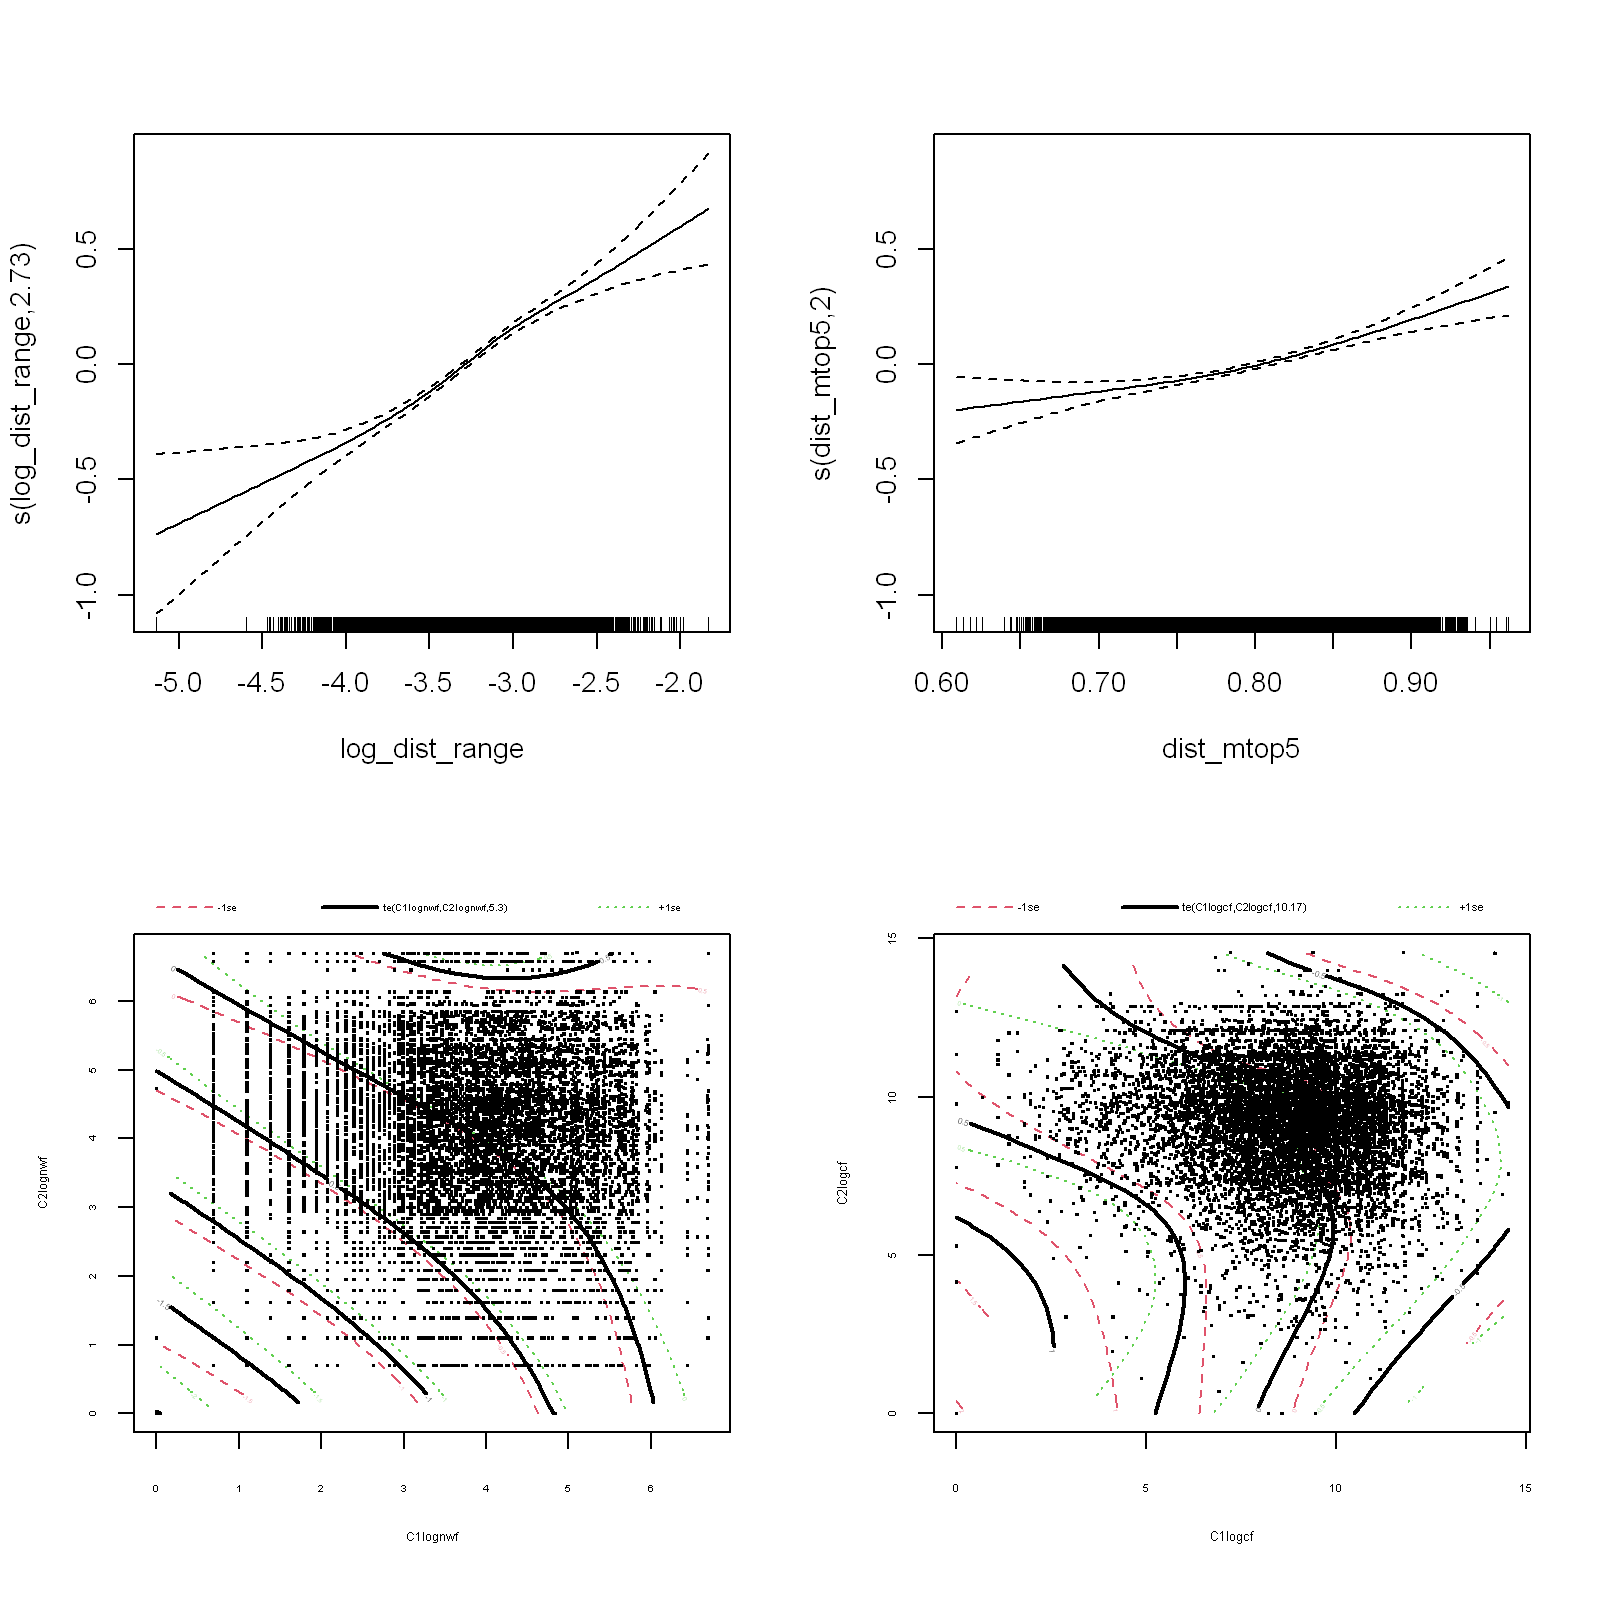

In [26]:
popt(8,8)
plot(err.0, pages=1, rug=T, cex=2)

### Err.1

In [28]:
err.1 = bam(logERR~te(log_dist_range, dist_mtop5)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [29]:
summary(err.1)


Family: gaussian 
Link function: identity 

Formula:
logERR ~ te(log_dist_range, dist_mtop5) + te(C1lognwf, C2lognwf) + 
    te(C1logcf, C2logcf)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.228767   0.008848   251.9   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                                 edf Ref.df     F p-value    
te(log_dist_range,dist_mtop5)  5.556  6.593 84.76  <2e-16 ***
te(C1lognwf,C2lognwf)          5.340  6.144 57.34  <2e-16 ***
te(C1logcf,C2logcf)           10.032 12.452 10.07  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.115   Deviance explained = 11.6%
-ML =  13020  Scale est. = 0.78449   n = 10022

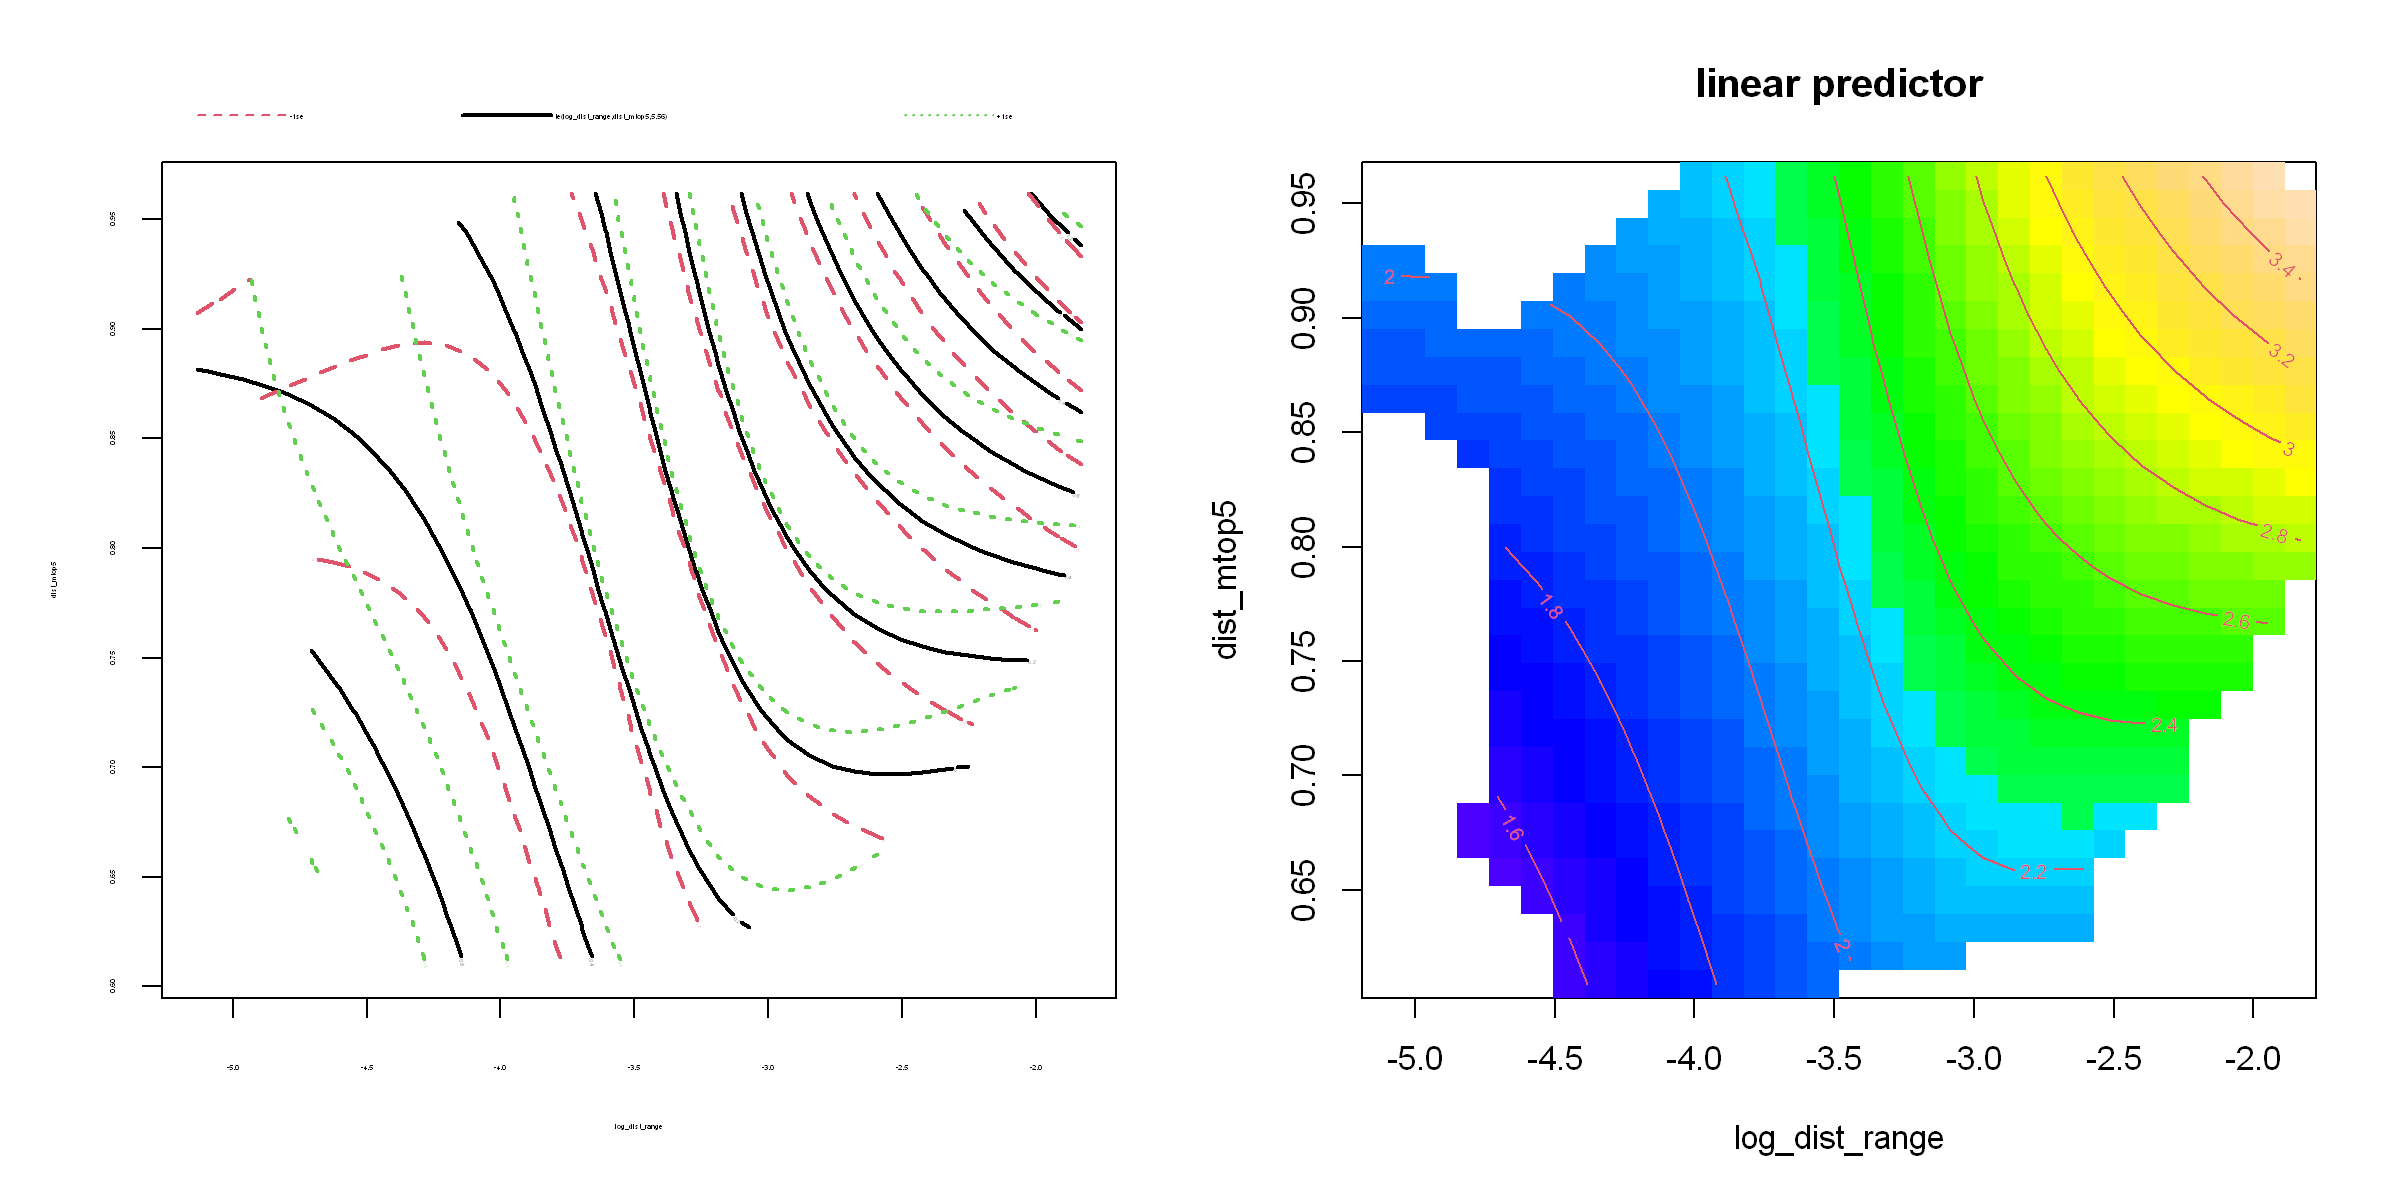

In [30]:
popt(12, 6)
par(mfrow=c(1,2))
plot(err.1, select=1, lwd=2)
vis.gam(err.1, view=c("log_dist_range", "dist_mtop5"), plot.type="contour", color="topo", too.far=0.1)

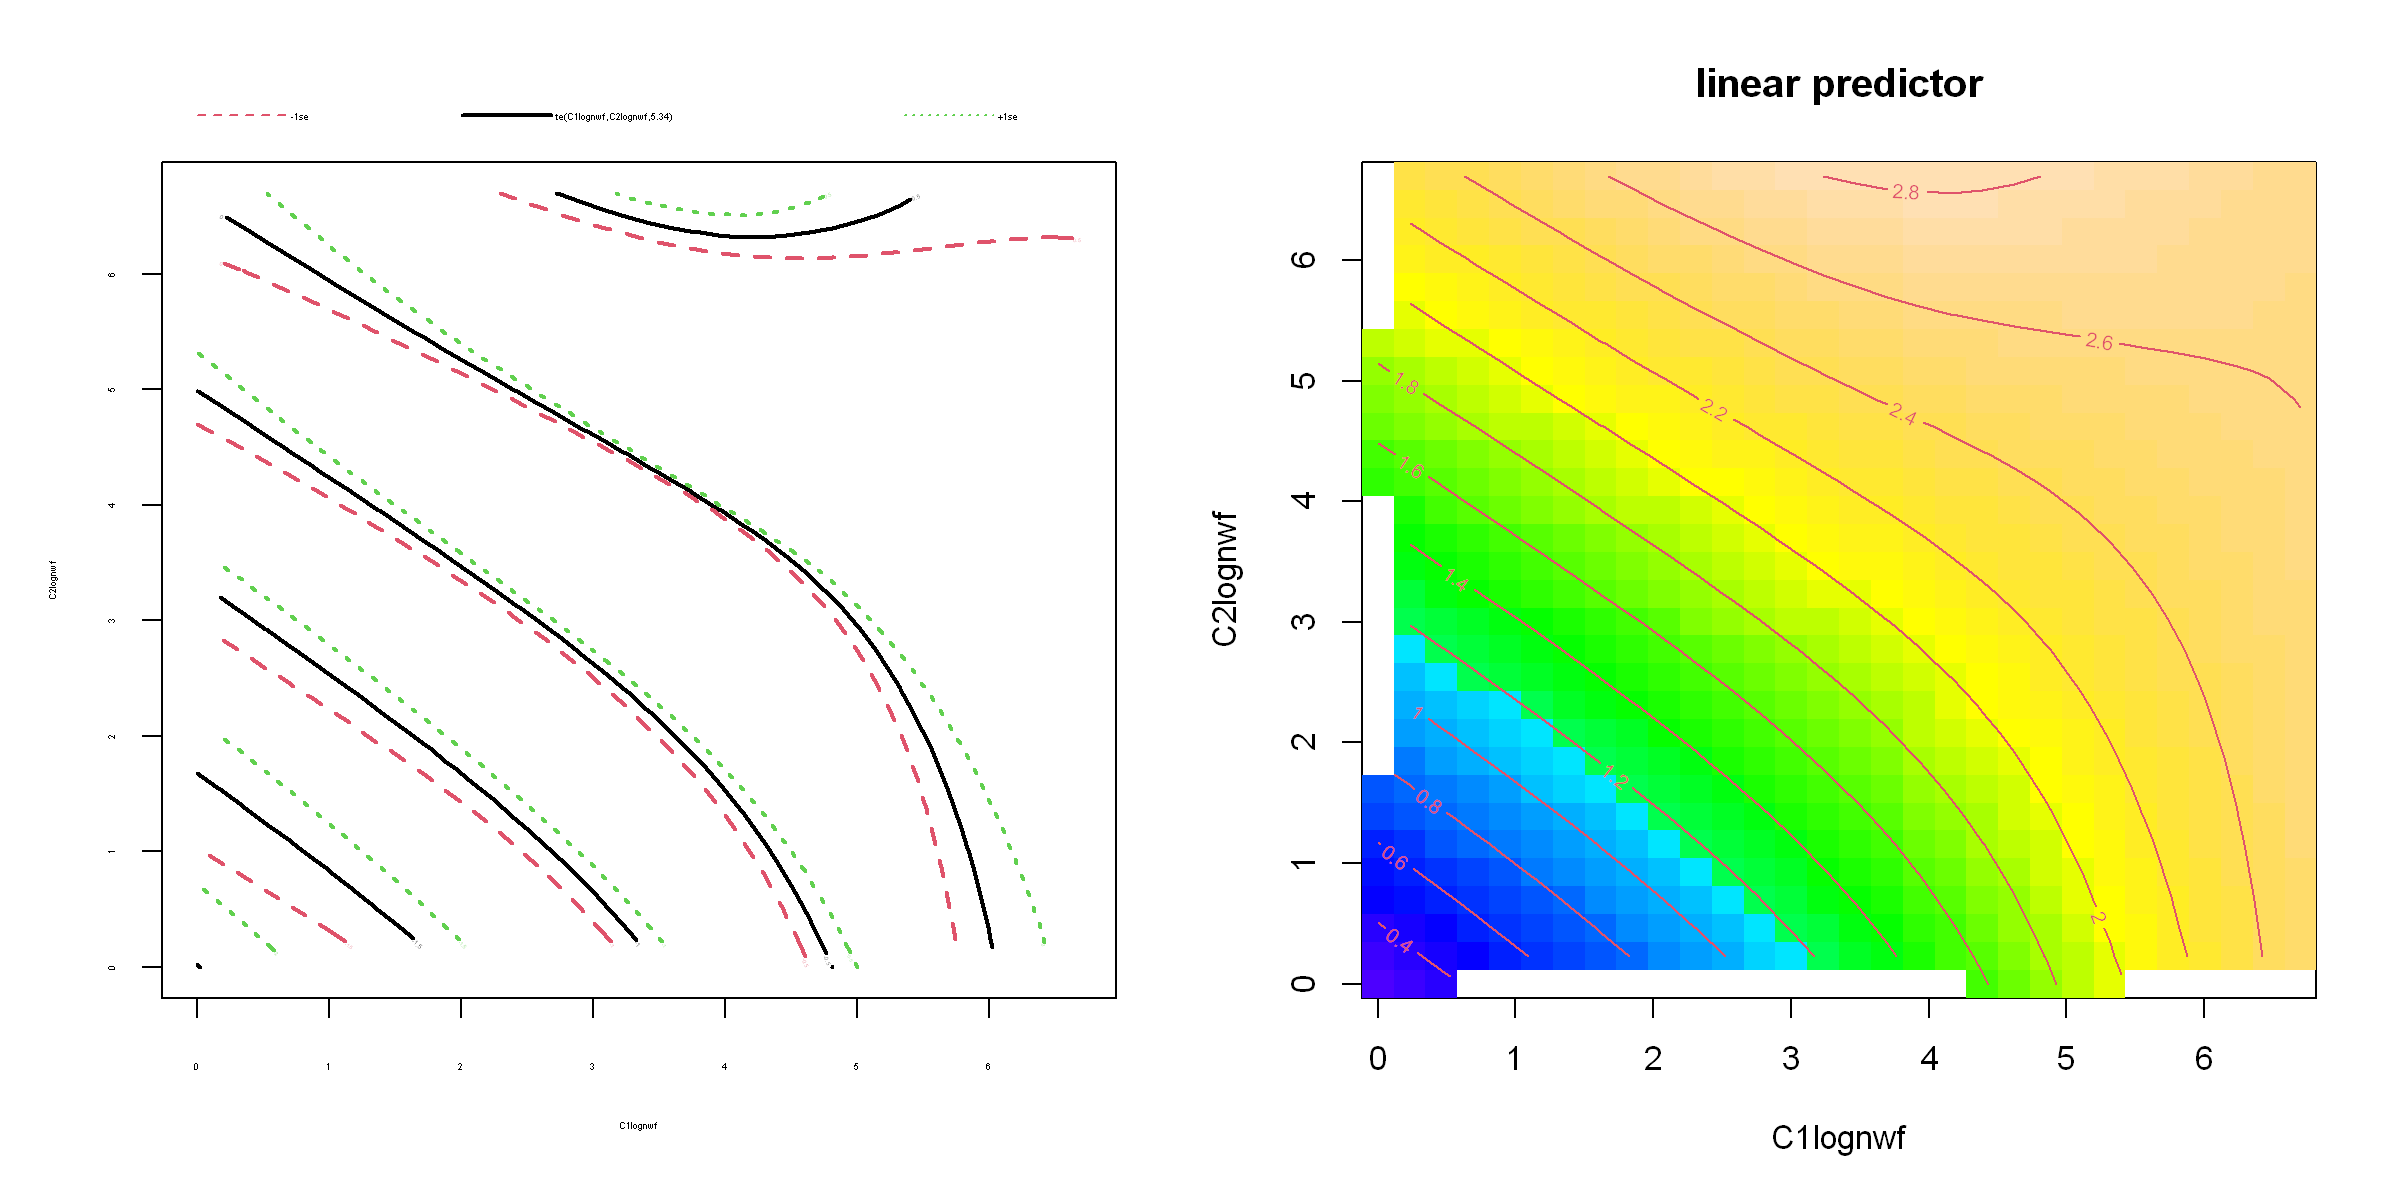

In [38]:
popt(12, 6)
par(mfrow=c(1,2))
plot(err.1, select=2, lwd=2)
vis.gam(err.1, view=c("C1lognwf", "C2lognwf"), plot.type="contour", color="topo", too.far=0.1)

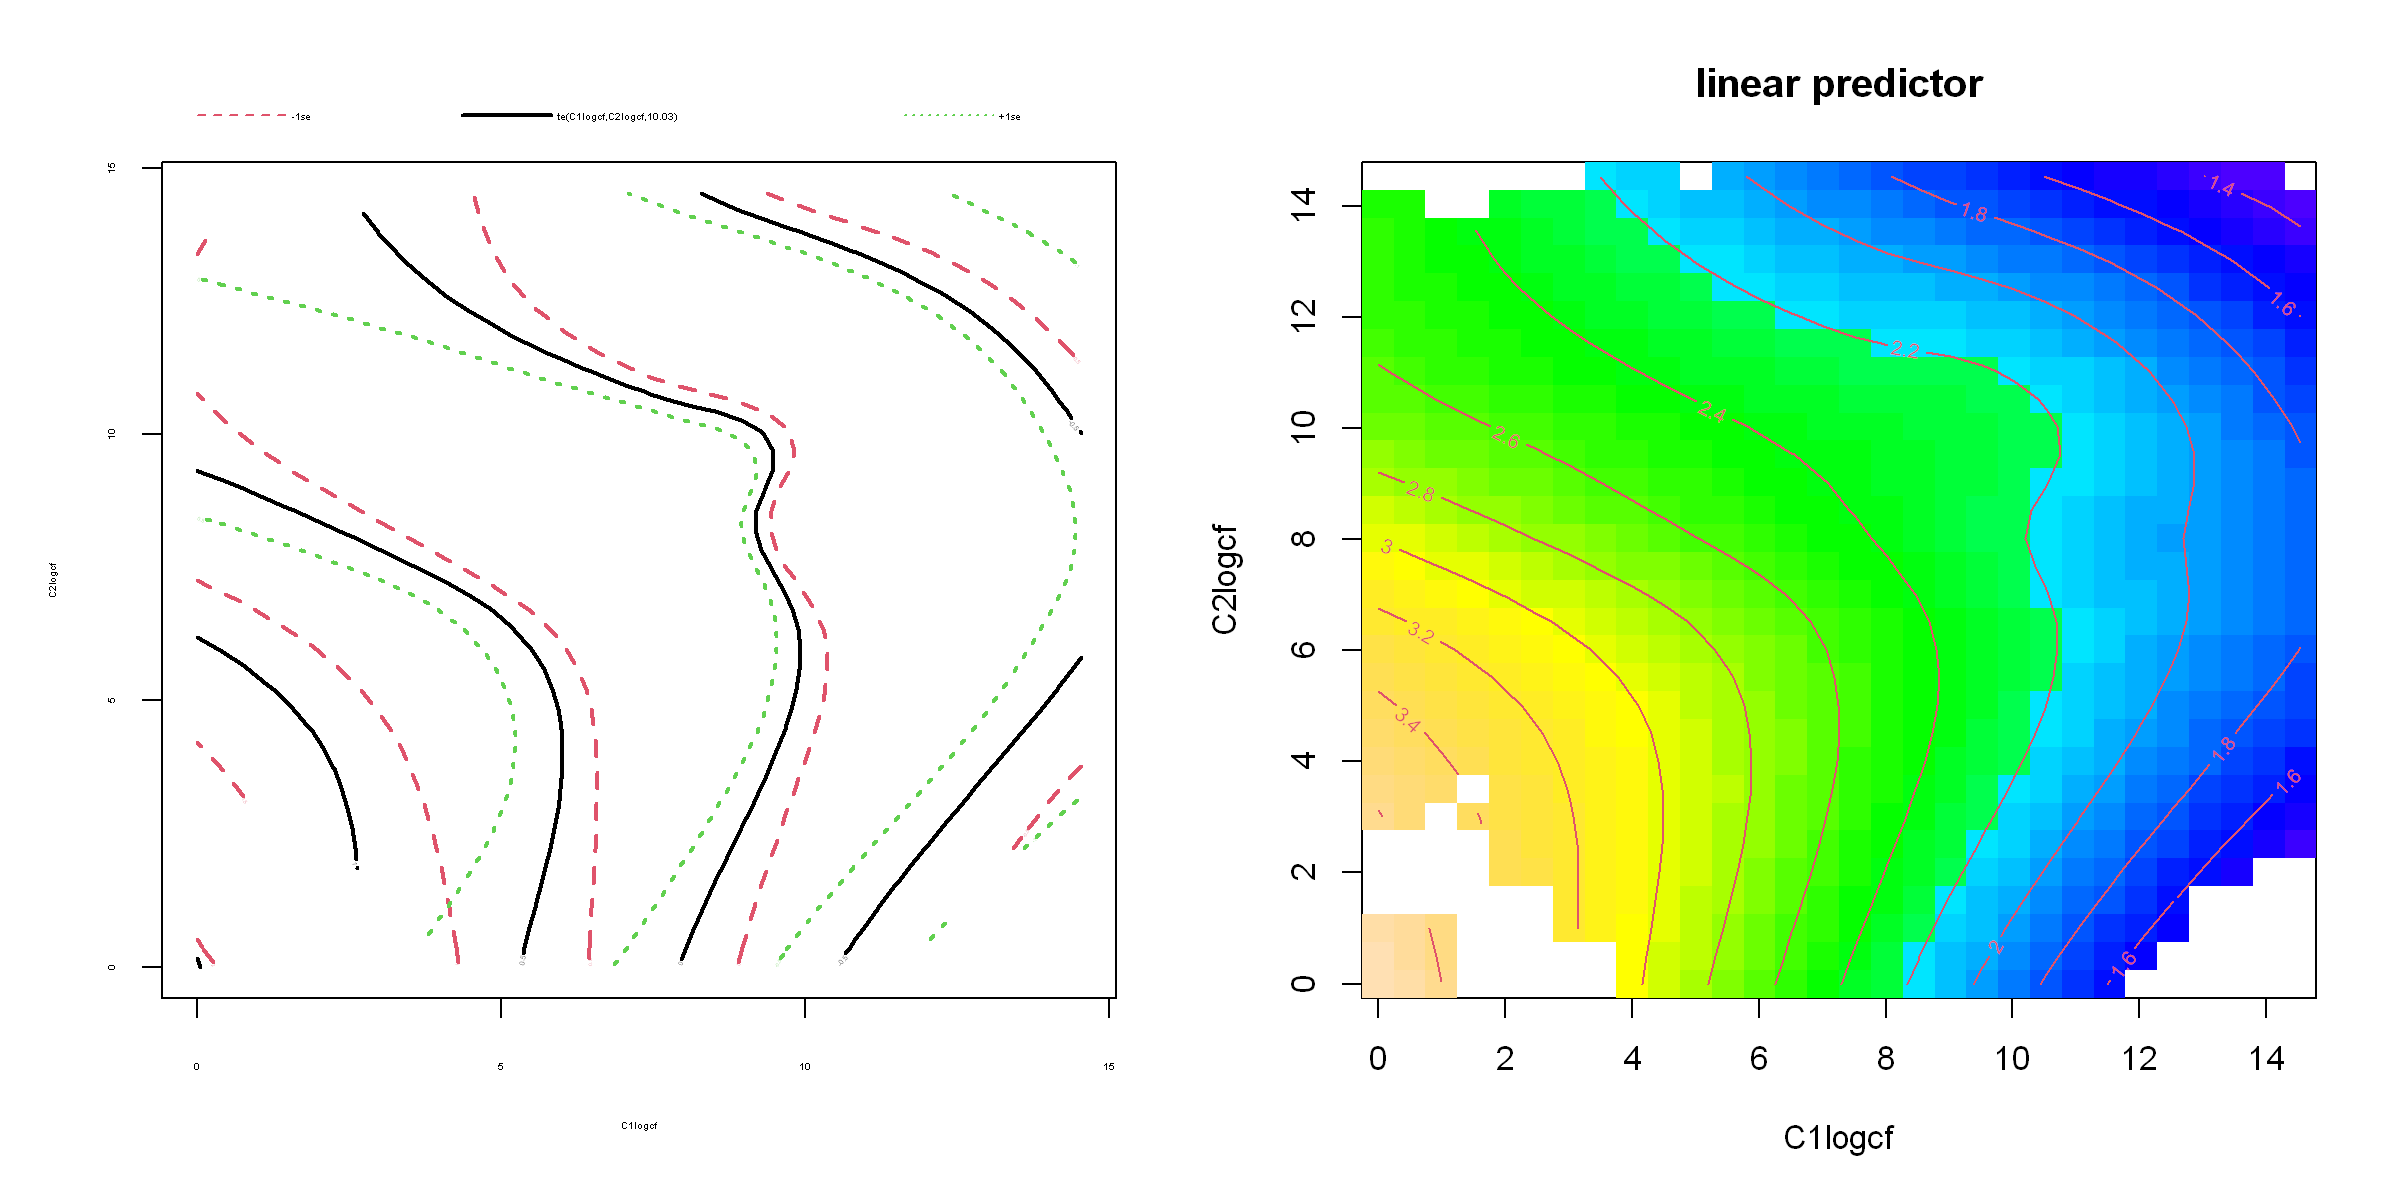

In [39]:
popt(12, 6)
par(mfrow=c(1,2))
plot(err.1, select=3, lwd=2)
vis.gam(err.1, view=c("C1logcf", "C2logcf"), plot.type="contour", color="topo", too.far=0.1)

In [40]:
concurvity(err.1)

,para,"te(log_dist_range,dist_mtop5)","te(C1lognwf,C2lognwf)","te(C1logcf,C2logcf)"
worst,0.0002585592,0.09780019,0.7810756,0.7824492
observed,0.0002585592,0.03367657,0.7097188,0.6443410
estimate,0.0002585592,0.01358178,0.3956378,0.4096876


In [41]:
compareML(err.0, err.1)

err.0: logERR ~ s(log_dist_range) + s(dist_mtop5) + te(C1lognwf, C2lognwf) + 
    te(C1logcf, C2logcf)

err.1: logERR ~ te(log_dist_range, dist_mtop5) + te(C1lognwf, C2lognwf) + 
    te(C1logcf, C2logcf)


Warning message in sprintf("*  ", h1):
"one argument not used by format '*  '"



Chi-square test of ML scores
-----
  Model    Score Edf Difference    Df p.value Sig.
1 err.0 13021.67  15                              
2 err.1 13019.63  16      2.043 1.000   0.043  *  

AIC difference: 4.30, model err.1 has lower AIC.



Warning message in compareML(err.0, err.1):
"Only small difference in ML...
"



Method: ML   Optimizer: outer newton
full convergence after 9 iterations.
Gradient range [-0.002542844,0.01113153]
(score 13091.51 & scale 0.7968876).
Hessian positive definite, eigenvalue range [0.001229742,5010.991].
Model rank =  58 / 58 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                                 k'   edf k-index p-value  
te(log_dist_range,dist_mtop5) 24.00  3.14    1.01   0.720  
s(C2lognwf)                    9.00  1.00    0.97   0.015 *
te(C1logcf,C2logcf)           24.00 11.66    0.98   0.070 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


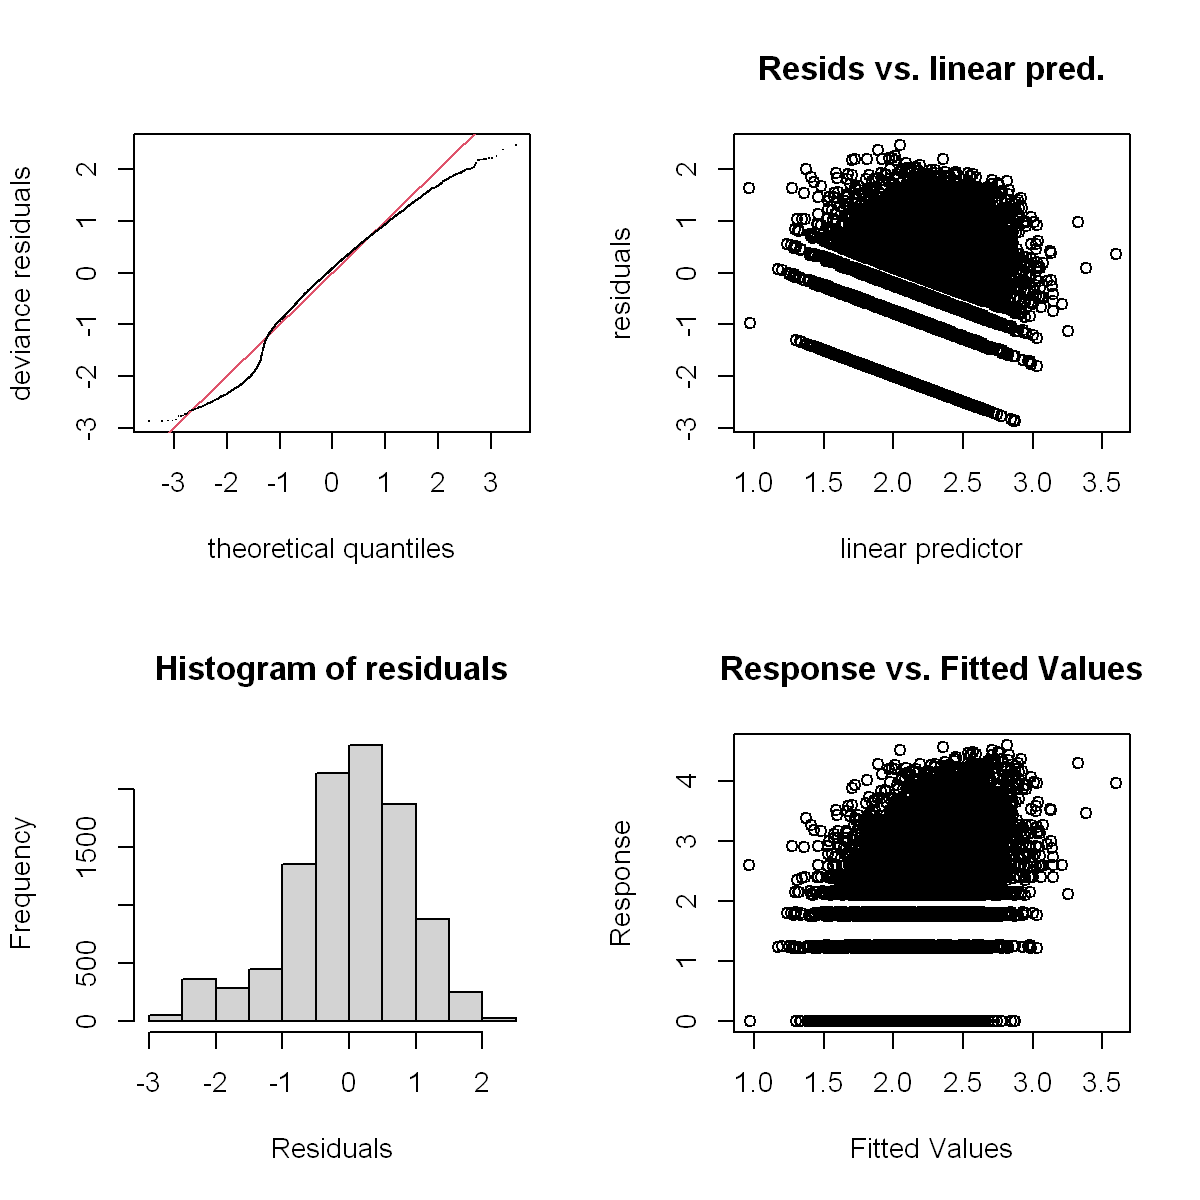

In [21]:
popt(6,6)
gam.check(err.1)

## GAM with RTinv

### RTinv.0

In [44]:
rtinv.0 = bam(RTinv~s(log_dist_range)+s(dist_mtop5)+s(C1stroke)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [45]:
summary(rtinv.0)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(log_dist_range) + s(dist_mtop5) + s(C1stroke) + te(C1lognwf, 
    C2lognwf) + te(C1logcf, C2logcf)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0725381  0.0009667   -1109   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                         edf Ref.df      F p-value    
s(log_dist_range)      3.224  4.120 59.496 < 2e-16 ***
s(dist_mtop5)          1.001  1.001  7.664 0.00563 ** 
s(C1stroke)            3.901  4.811 38.271 < 2e-16 ***
te(C1lognwf,C2lognwf)  6.201  7.076 29.212 < 2e-16 ***
te(C1logcf,C2logcf)   12.015 14.811 12.231 < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0779   Deviance explained = 8.03%
-ML = -9161.6  Scale est. = 0.0093648  n = 10022

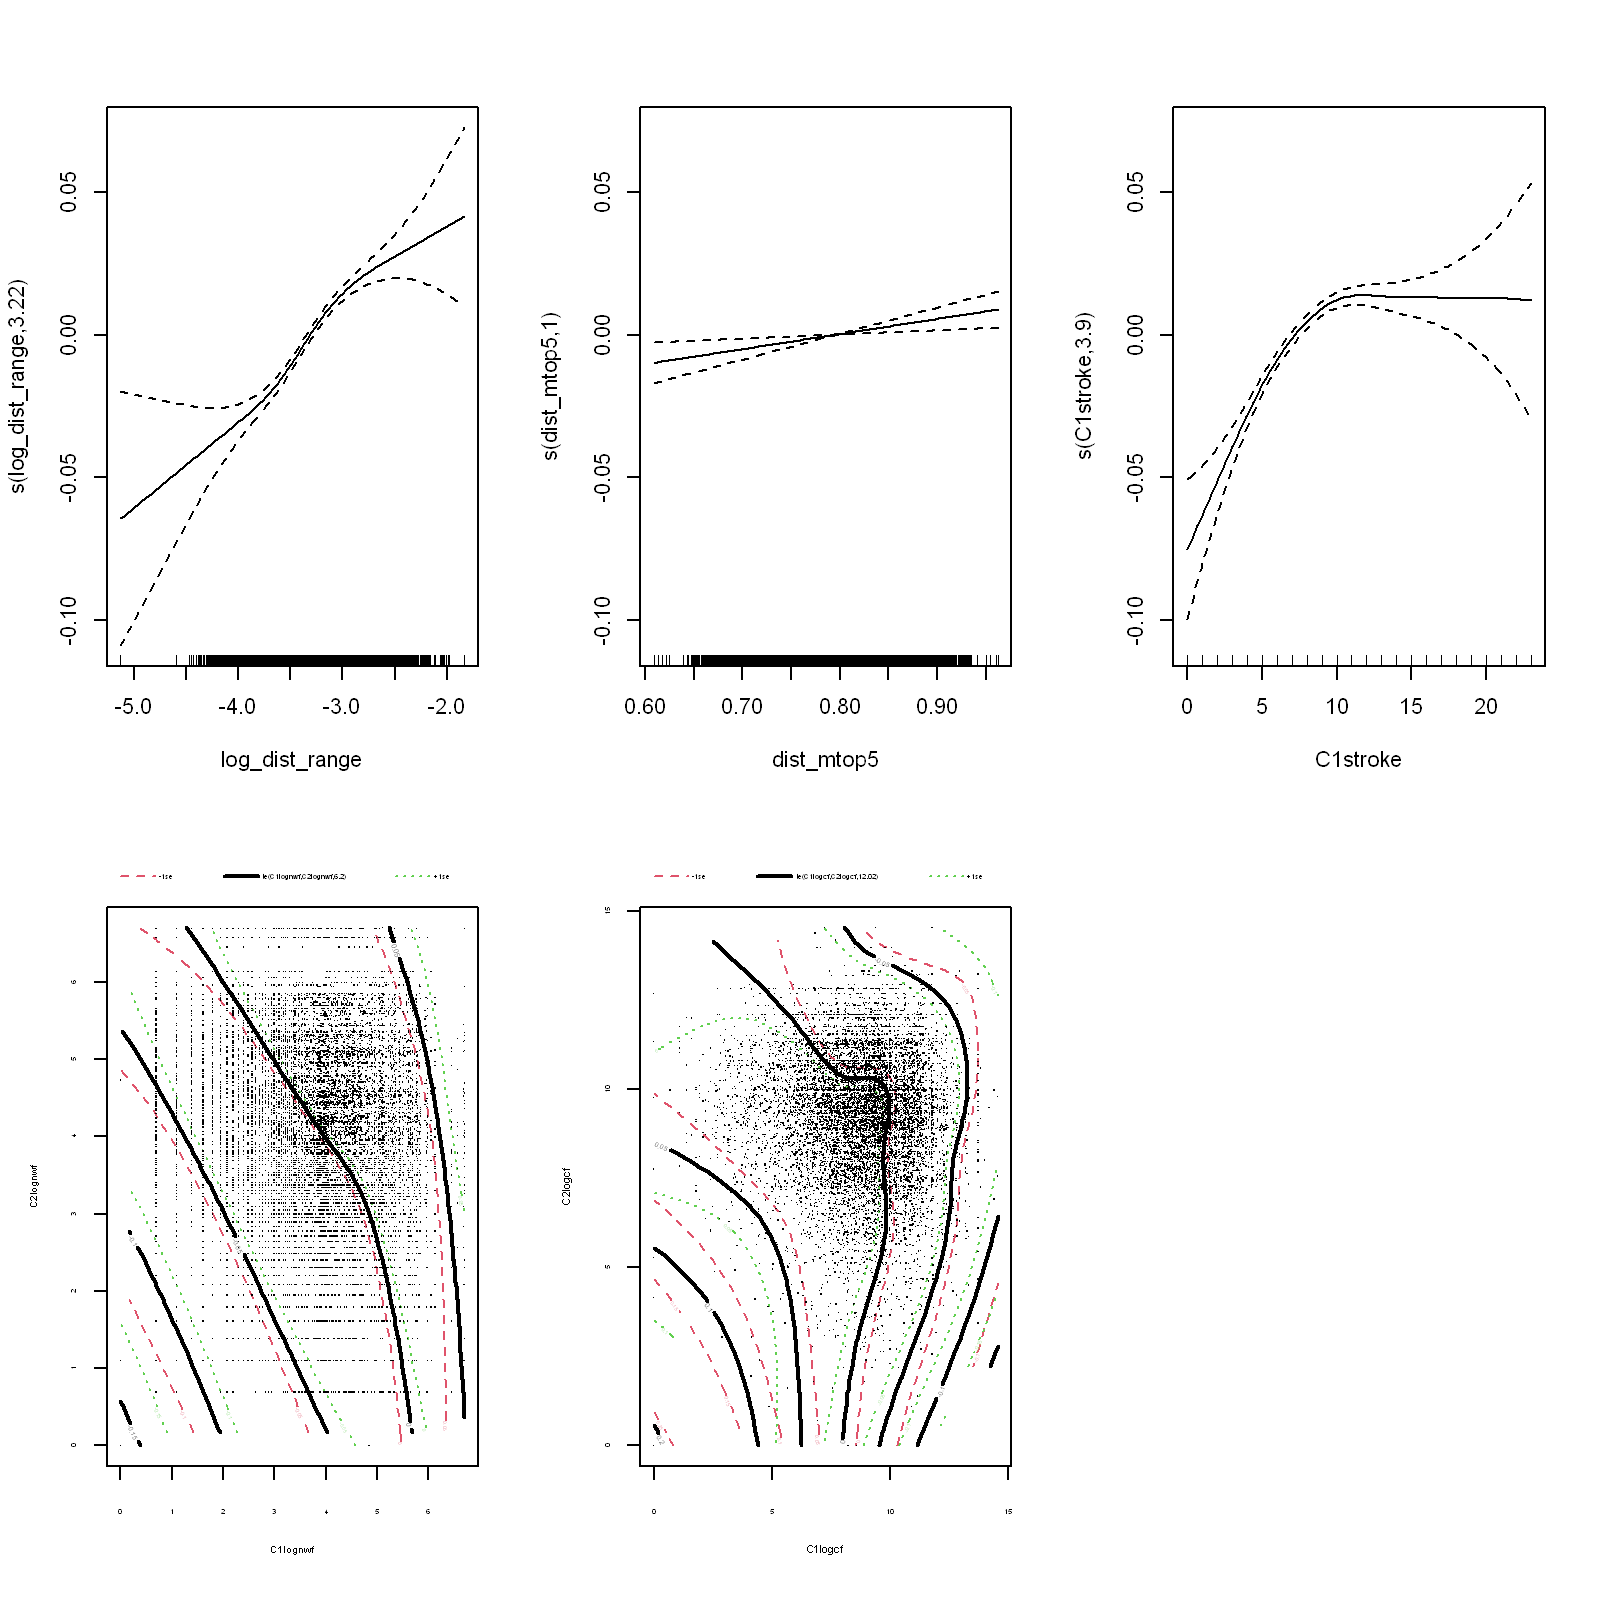

In [46]:
popt(8,8)
plot(rtinv.0, pages=1, rug=T)

### RTinv.1

In [55]:
rtinv.1 = bam(RTinv~te(log_dist_range, dist_mtop5)+s(C1stroke)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [56]:
summary(rtinv.1)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ te(log_dist_range, dist_mtop5) + s(C1stroke) + te(C1lognwf, 
    C2lognwf) + te(C1logcf, C2logcf)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0725331  0.0009661   -1110   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                                 edf Ref.df     F p-value    
te(log_dist_range,dist_mtop5)  6.396  7.448 40.09  <2e-16 ***
s(C1stroke)                    3.880  4.787 37.38  <2e-16 ***
te(C1lognwf,C2lognwf)          6.185  7.056 28.80  <2e-16 ***
te(C1logcf,C2logcf)           11.853 14.653 11.73  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0791   Deviance explained = 8.17%
-ML = -9165.3  Scale est. = 0.0093524  n = 10022

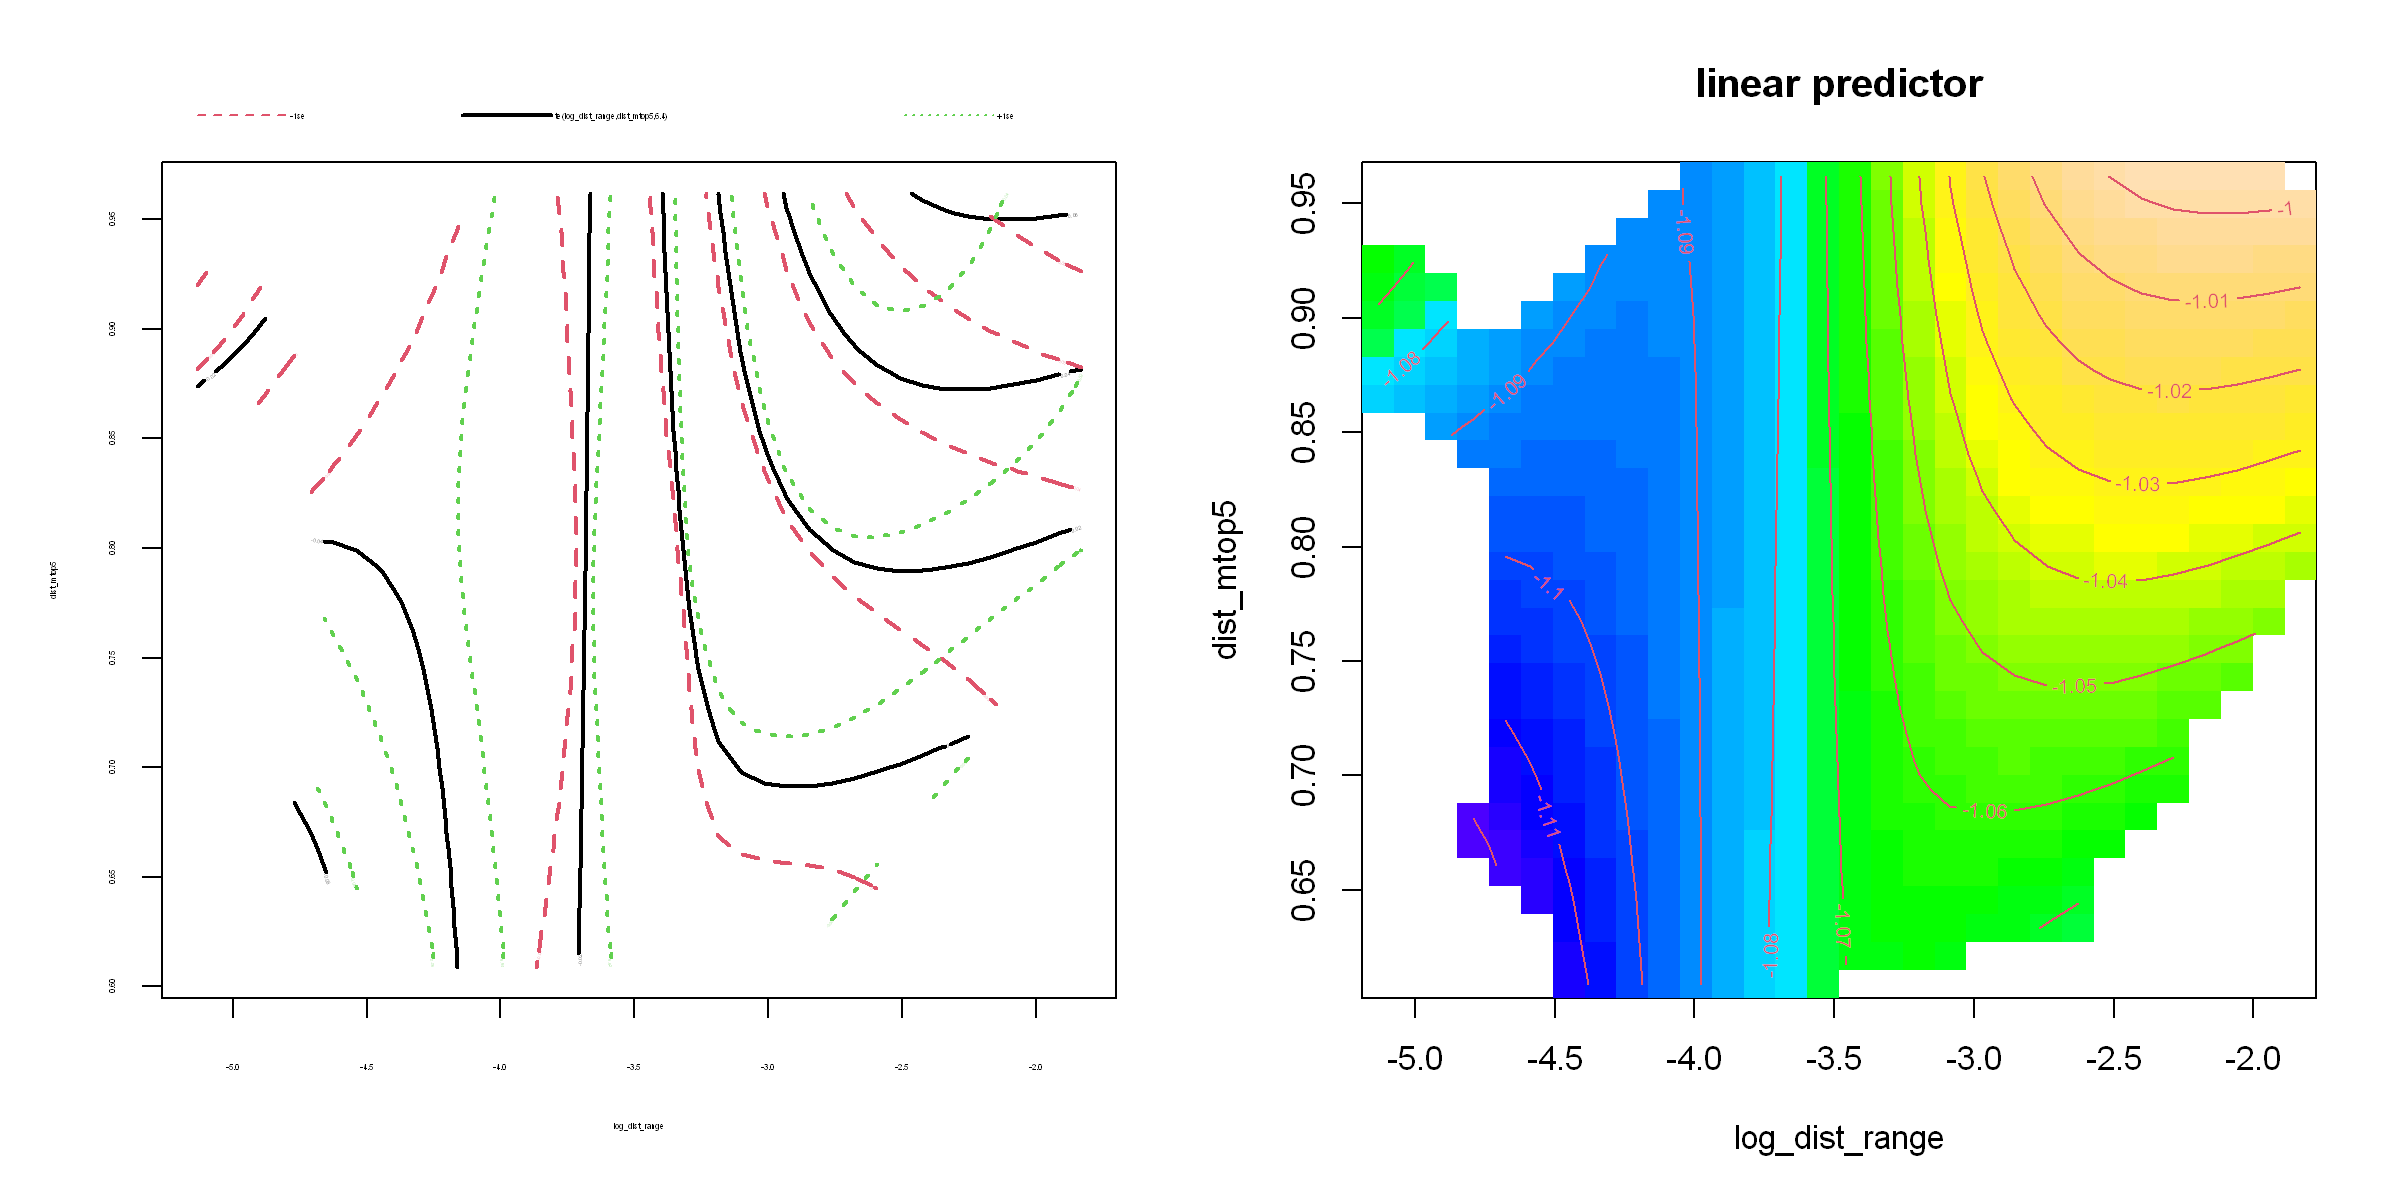

In [57]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.1, select=1, lwd=2)
vis.gam(rtinv.1, view=c("log_dist_range", "dist_mtop5"), plot.type="contour", color="topo", too.far=0.1)

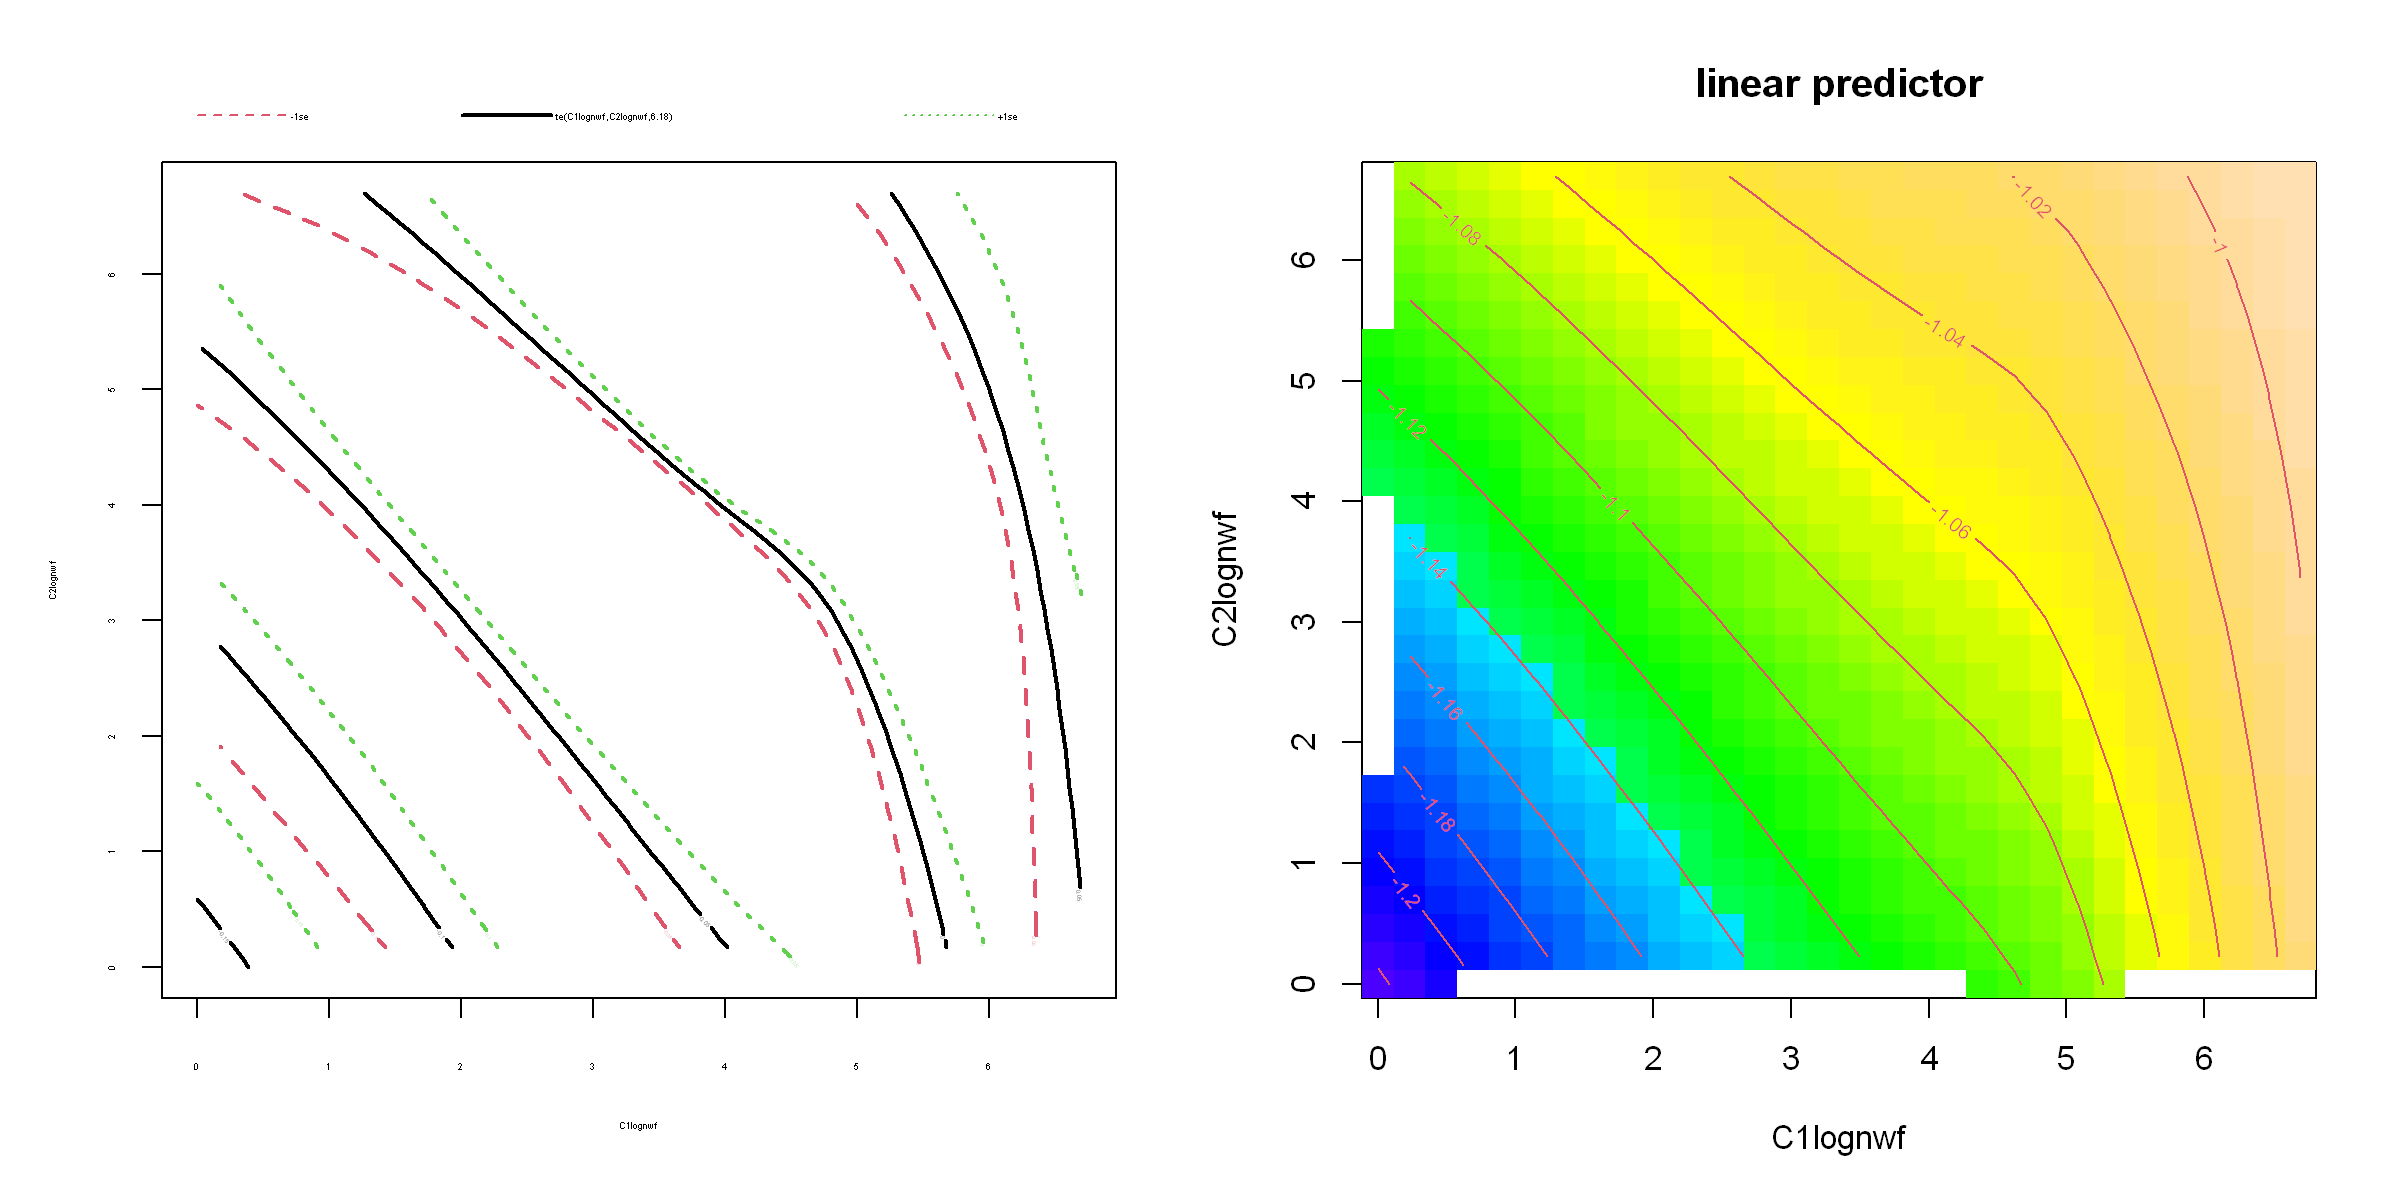

In [60]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.1, select=3, lwd=2)
vis.gam(rtinv.1, view=c("C1lognwf", "C2lognwf"), plot.type="contour", color="topo", too.far=0.1)

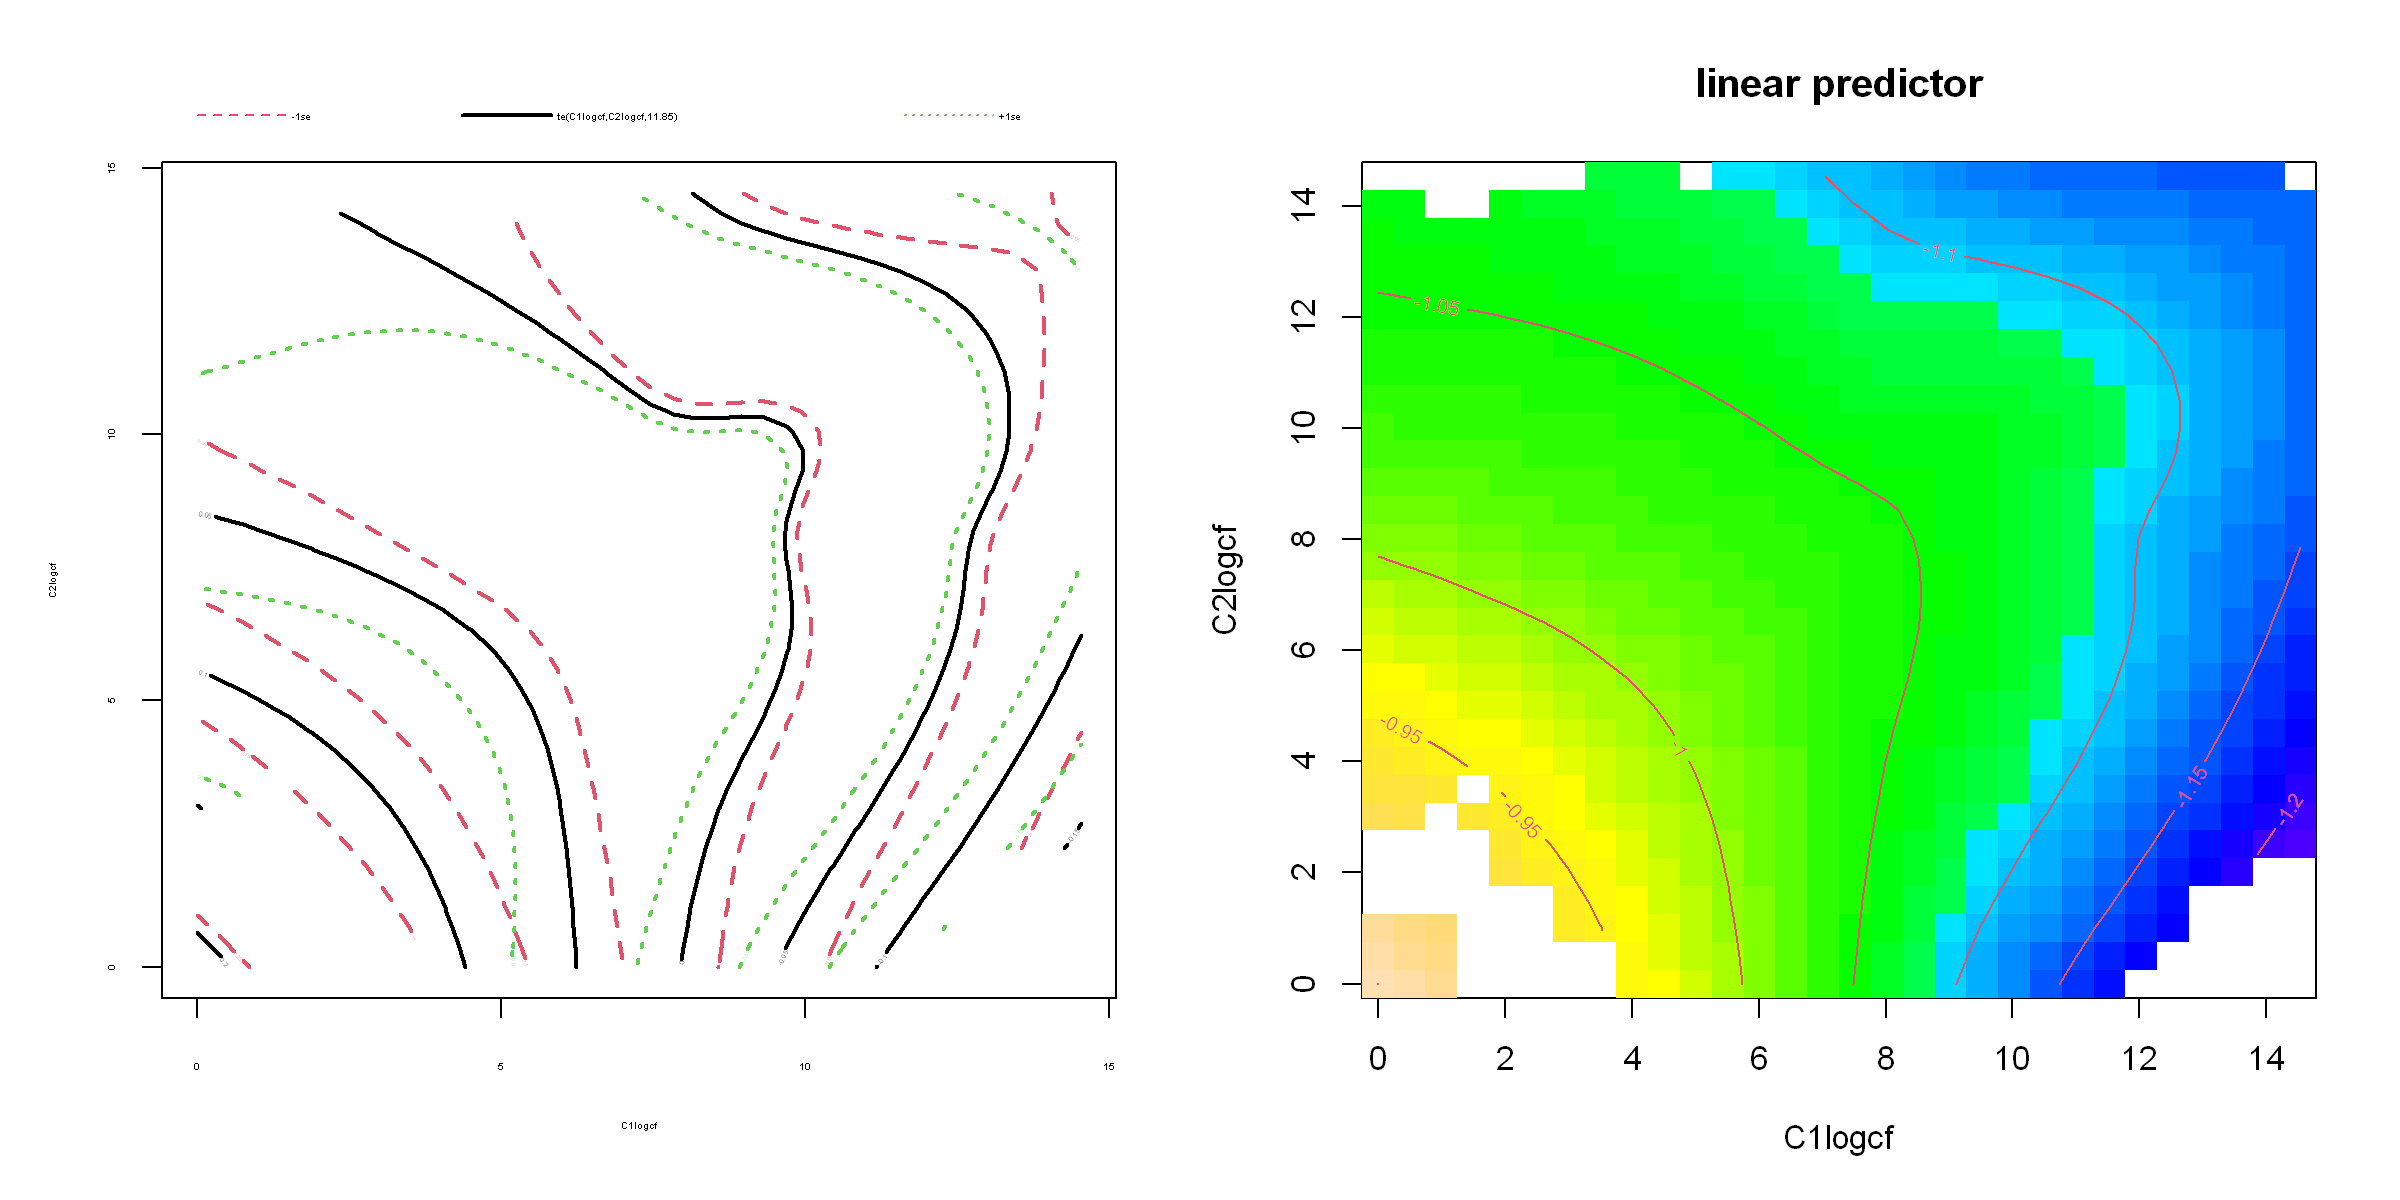

In [59]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.1, select=4, lwd=2)
vis.gam(rtinv.1, view=c("C1logcf", "C2logcf"), plot.type="contour", color="topo", too.far=0.1)

In [80]:
compareML(rtinv.0, rtinv.1)

rtinv.0: RTinv ~ s(log_dist_range) + s(dist_mtop5) + s(C1stroke) + te(C1lognwf, 
    C2lognwf) + te(C1logcf, C2logcf)

rtinv.1: RTinv ~ te(log_dist_range, dist_mtop5) + s(C1stroke) + te(C1lognwf, 
    C2lognwf) + te(C1logcf, C2logcf)


Warning message in sprintf("** ", h1):
"one argument not used by format '** '"



Chi-square test of ML scores
-----
    Model     Score Edf Difference    Df p.value Sig.
1 rtinv.0 -9161.569  17                              
2 rtinv.1 -9165.333  18      3.764 1.000   0.006  ** 

AIC difference: 11.47, model rtinv.1 has lower AIC.



Warning message in compareML(rtinv.0, rtinv.1):
"Only small difference in ML...
"



Method: ML   Optimizer: outer newton
full convergence after 8 iterations.
Gradient range [-0.001778964,0.002069318]
(score -9165.333 & scale 0.009352433).
Hessian positive definite, eigenvalue range [0.0002321524,5011.003].
Model rank =  82 / 82 

Basis dimension (k) checking results. Low p-value (k-index<1) may
indicate that k is too low, especially if edf is close to k'.

                                 k'   edf k-index p-value  
te(log_dist_range,dist_mtop5) 24.00  6.40    1.00    0.51  
s(C1stroke)                    9.00  3.88    1.01    0.80  
te(C1lognwf,C2lognwf)         24.00  6.18    1.00    0.40  
te(C1logcf,C2logcf)           24.00 11.85    0.98    0.02 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


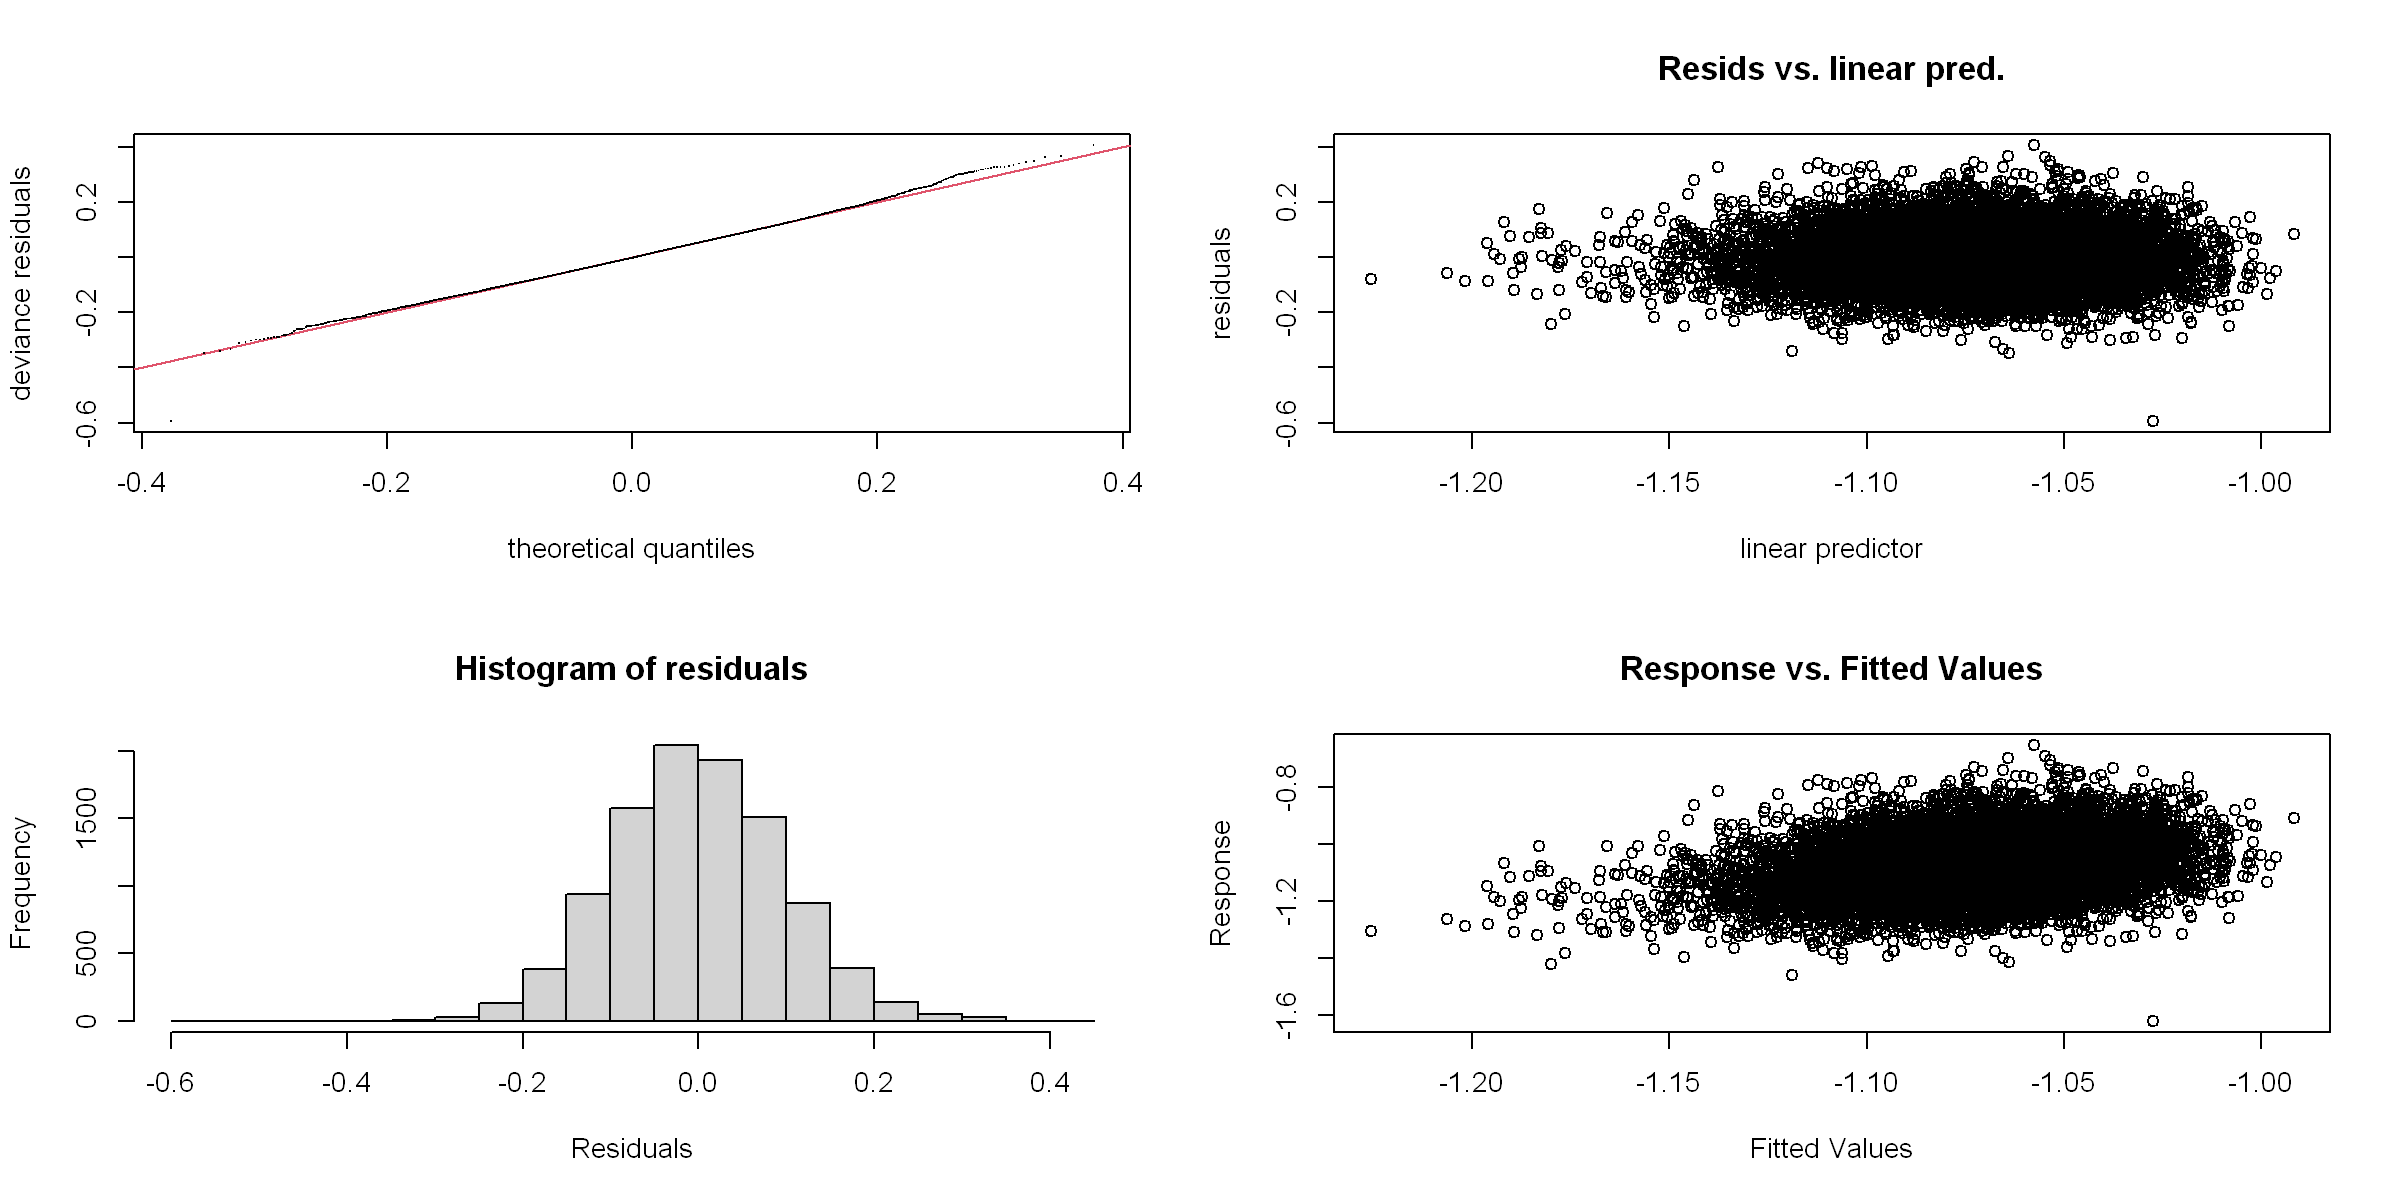

In [61]:
gam.check(rtinv.1)

In [ ]:
## https://cran.r-project.org/web/packages/mgcViz/vignettes/mgcviz.html#new-version-of-traditional-model-checks

### RTinv.no.dist

In [70]:
rtinv.no.dist = bam(RTinv~s(C1stroke)+te(C1lognwf,C2lognwf)+te(C1logcf,C2logcf), data=data, method="ML")

In [71]:
summary(rtinv.no.dist)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ s(C1stroke) + te(C1lognwf, C2lognwf) + te(C1logcf, C2logcf)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0725604  0.0009804   -1094   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                         edf Ref.df     F p-value    
s(C1stroke)            3.958  4.875 37.12  <2e-16 ***
te(C1lognwf,C2lognwf)  6.361  7.496 31.71  <2e-16 ***
te(C1logcf,C2logcf)   10.715 13.480 10.72  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0514   Deviance explained = 5.34%
-ML = -9025.3  Scale est. = 0.0096331  n = 10022

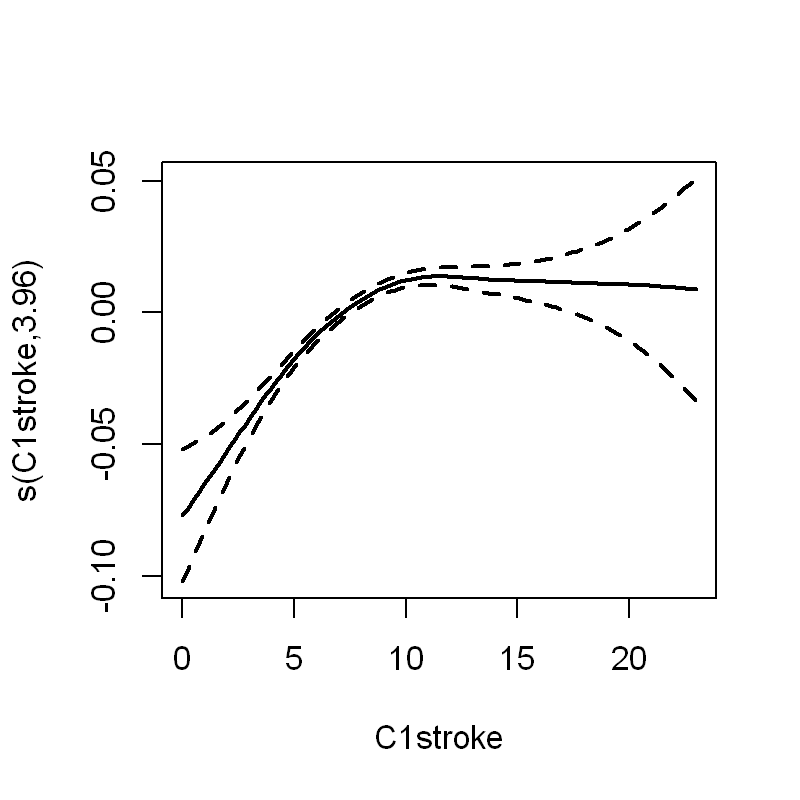

In [79]:
popt(4, 4)
plot(rtinv.no.dist, select=1, lwd=2)

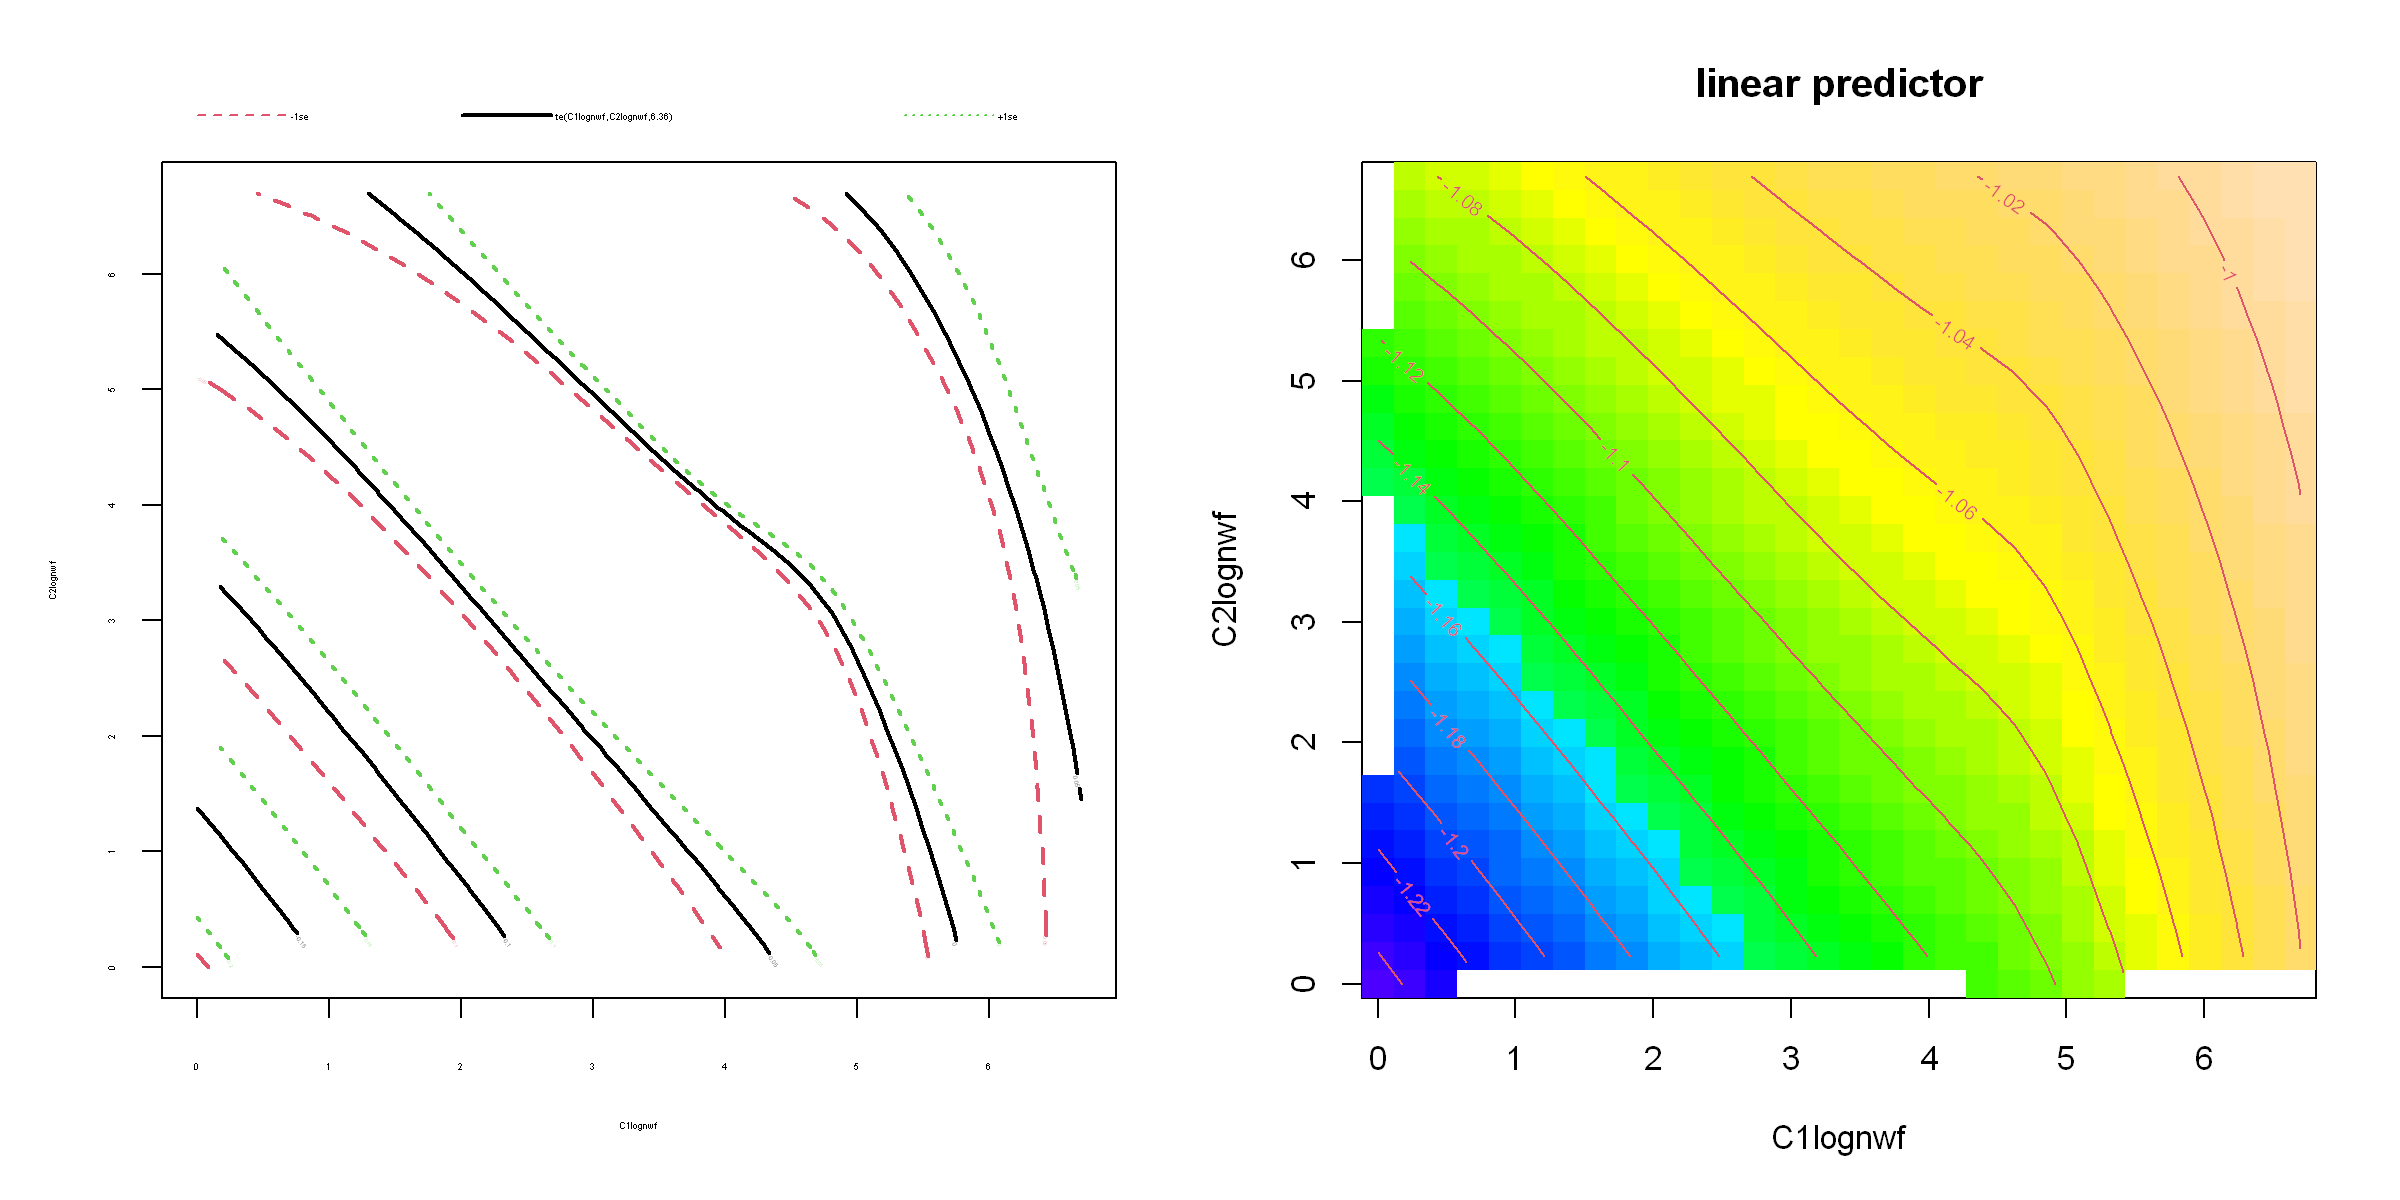

In [67]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.no.dist, select=2, lwd=2)
vis.gam(rtinv.no.dist, view=c("C1lognwf", "C2lognwf"), plot.type="contour", color="topo", too.far=0.1)

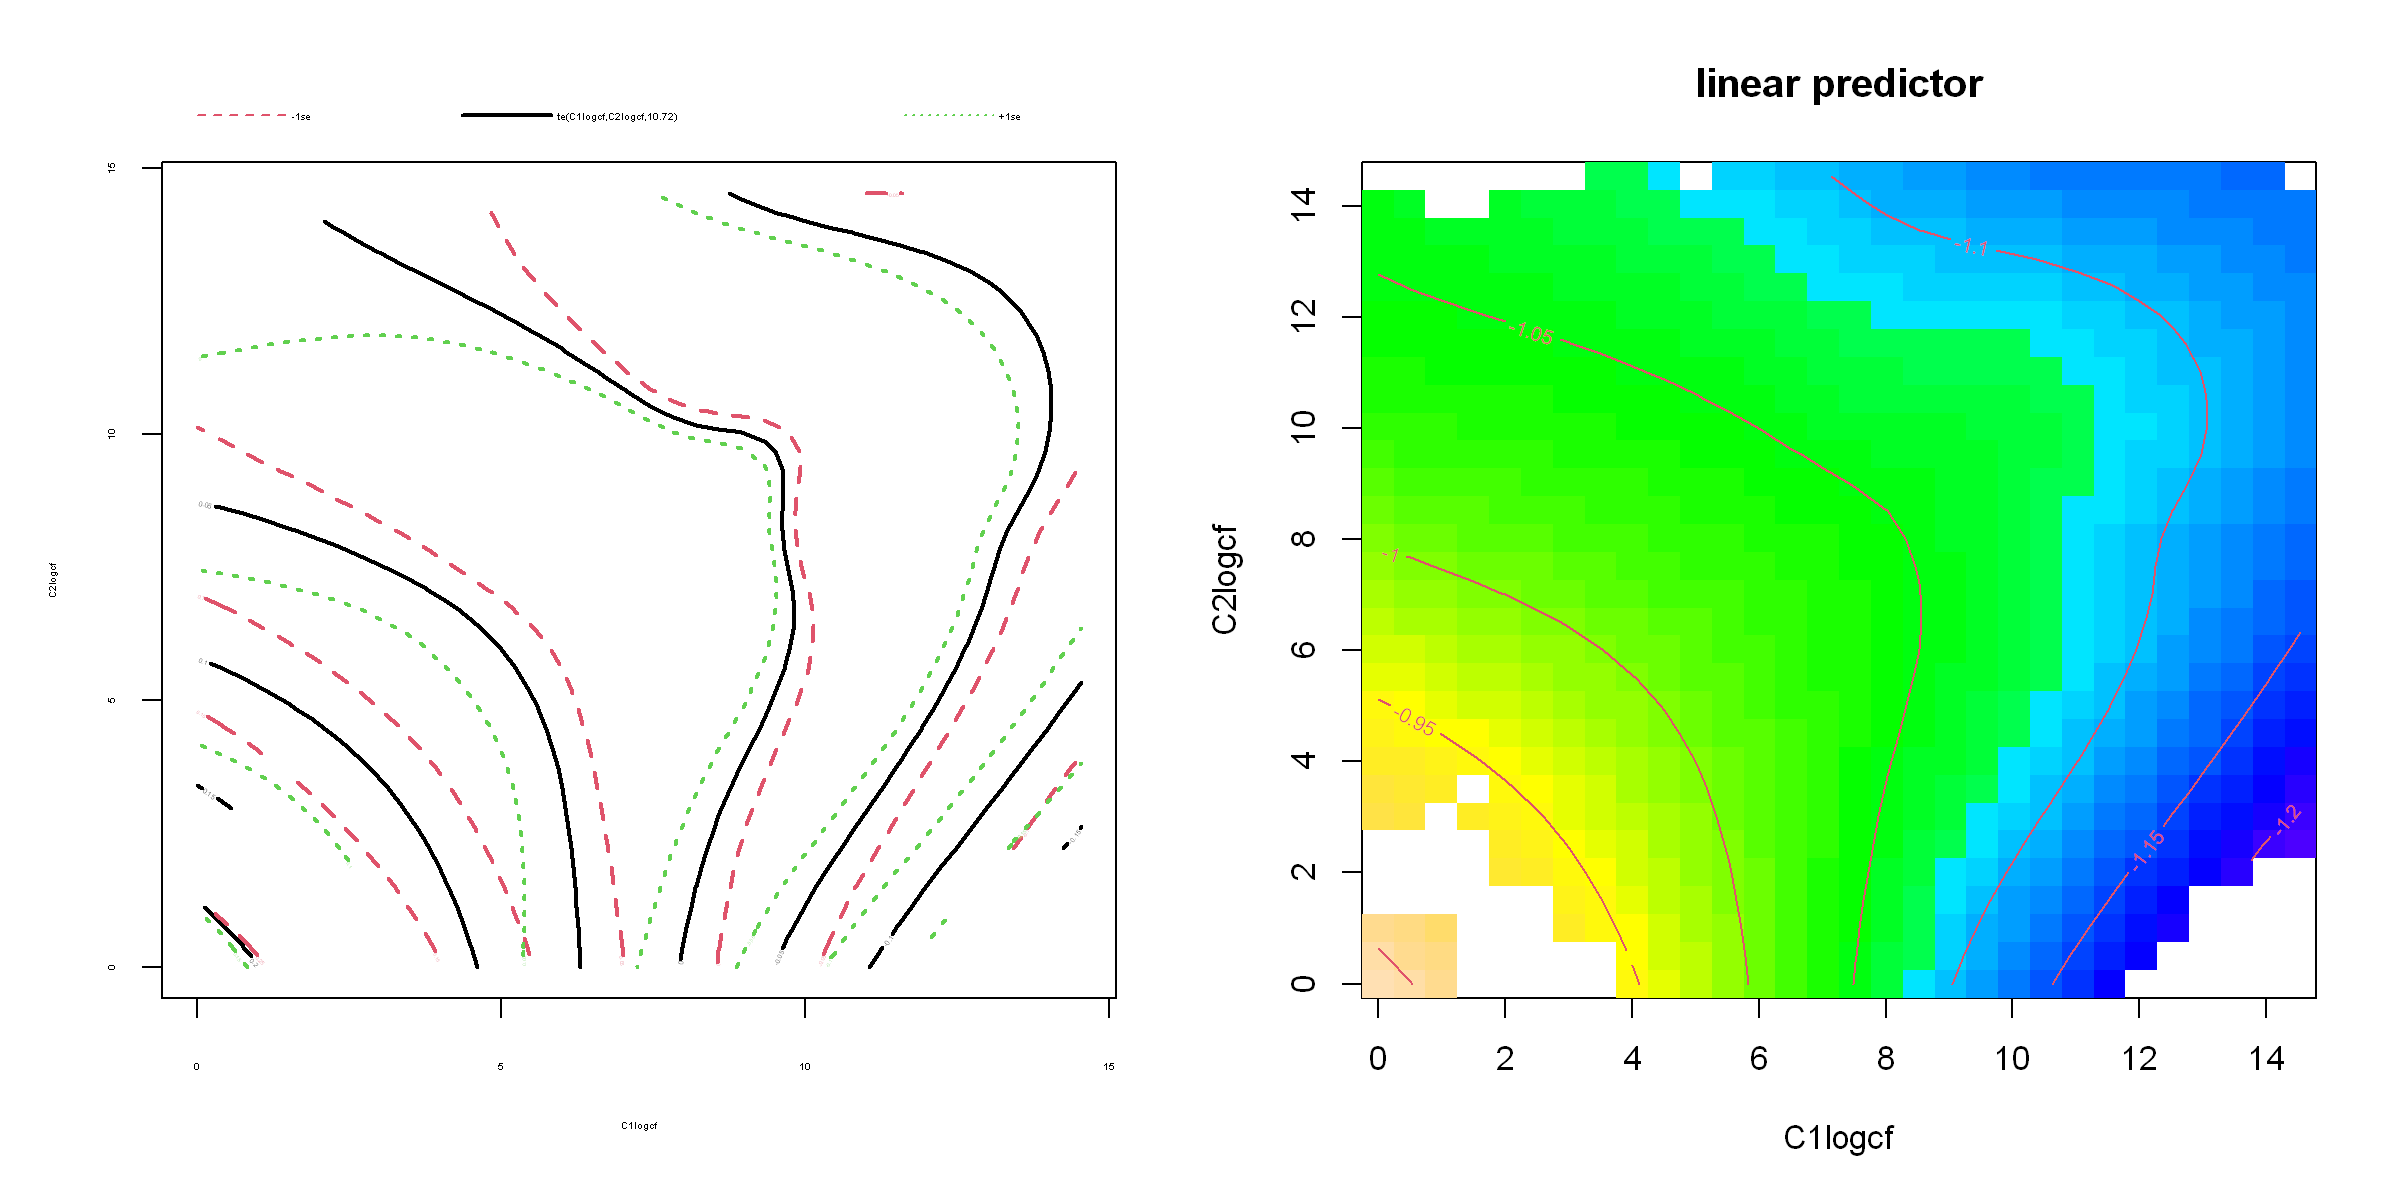

In [77]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.no.dist, select=3, lwd=2)
vis.gam(rtinv.no.dist, view=c("C1logcf", "C2logcf"), plot.type="contour", color="topo", too.far=0.1)

### RTinv.cf

In [72]:
rtinv.cf = bam(RTinv~te(C1logcf,C2logcf), data=data, method="ML")

In [73]:
summary(rtinv.cf)


Family: gaussian 
Link function: identity 

Formula:
RTinv ~ te(C1logcf, C2logcf)

Parametric coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.0725260  0.0009974   -1075   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
                      edf Ref.df     F p-value    
te(C1logcf,C2logcf) 12.57  15.28 12.28  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.0183   Deviance explained = 1.96%
-ML = -8859.3  Scale est. = 0.0099693  n = 10022

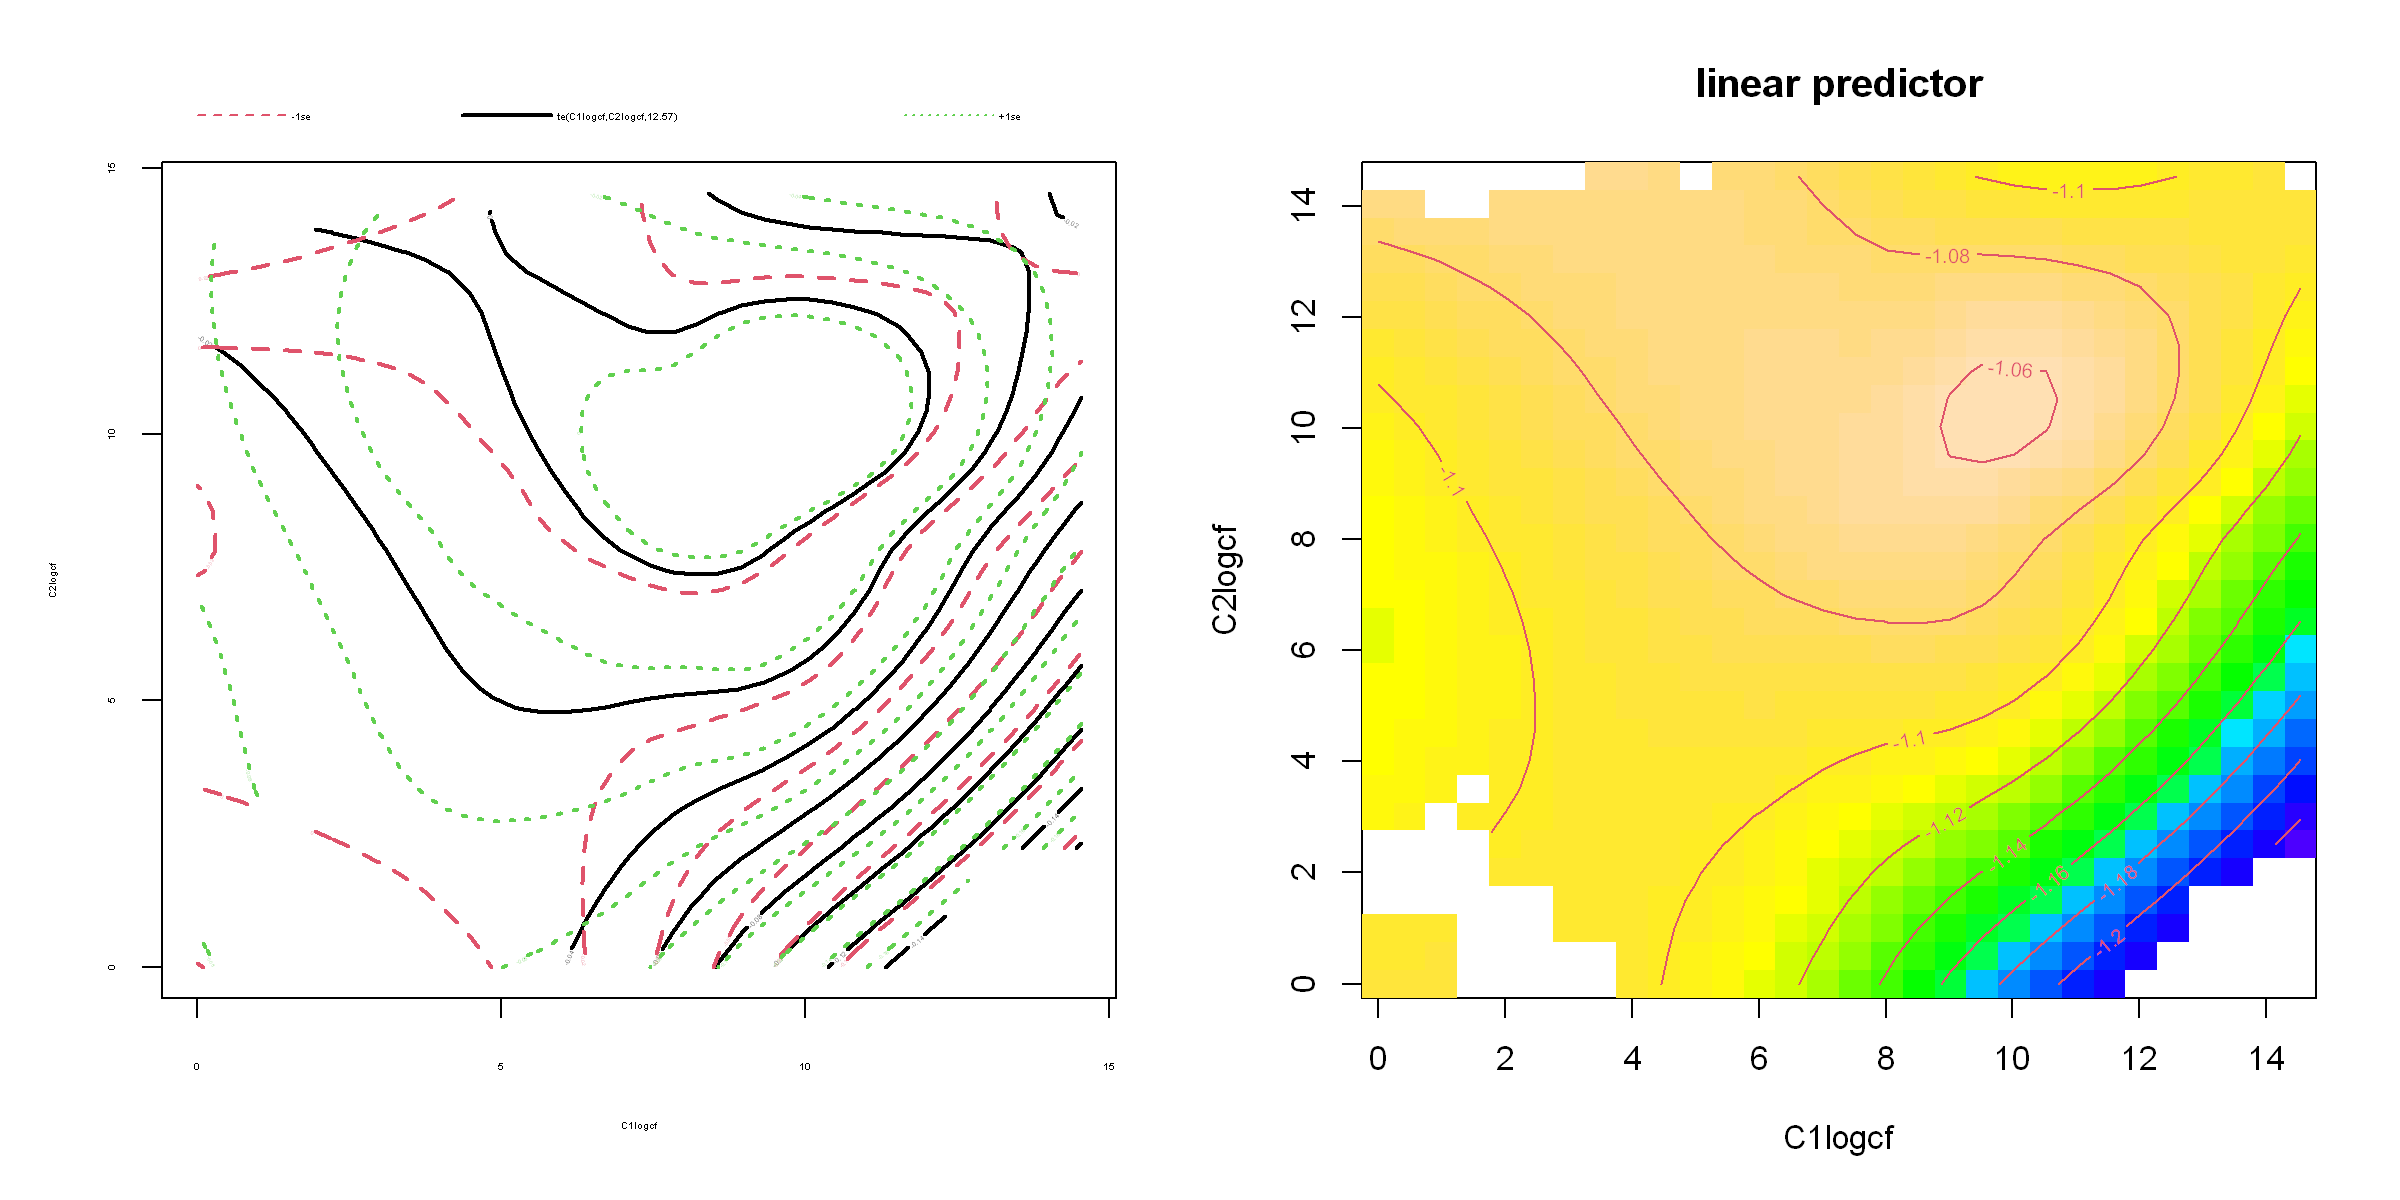

In [76]:
popt(12, 6)
par(mfrow=c(1,2))
plot(rtinv.cf, select=1, lwd=2)
vis.gam(rtinv.cf, view=c("C1logcf", "C2logcf"), plot.type="contour", color="topo", too.far=0.1)